# 2022_05_09_TLP_data_exploration

#### by Ioannis STASINOPOULOS
https://www.linkedin.com/in/ioannis-stasinopoulos/

last update: 2022.05.10 

In [296]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [297]:
df = pd.read_csv('ASRS_10y_data.csv')

/Users/gs/Desktop/sample_project/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (15,19,40,41,48,67,71,72,78,79,81,89,99) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [298]:
# Import several .csv files and concatenate them in one
# (was necessary only the first time, when several .csv were downloaded from the server)

# files = [] # instantiate empty list

# for i in np.arange(1,9): # we have filenames from 1-8
    
#     # append pandas DataFrames to 'files' --> files becomes list of df's.
#     files.append(pd.read_csv("data/ASRS_DBOnline"+str(i)+".csv", header= 1)) # the 2nd line contains the headers

# # concatenate into 1 df:
# df = pd.concat(files)

In [299]:
print("We have", len(df), "events to work with.\n\n",
     "/!\ These include unmanned-aircraft-related entries; yet the latter are insignificantly low in number (see below)")

We have 24063 events to work with.

 /!\ These include unmanned-aircraft-related entries; yet the latter are insignificantly low in number (see below)


In [300]:
df.head()

,ACN,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),Flight Conditions,Weather Elements / Visibility,Work Environment Factor,Light,Ceiling,RVR.Single Value,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On Board,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Airspace Authorization Provider (UAS),Operating Under Waivers / Exemptions / Authorizations (UAS),Waivers / Exemptions / Authorizations (UAS),Airworthiness Certification (UAS),Weight Category (UAS),Configuration (UAS),Flight Operated As (UAS),Flight Operated with Visual Observer (UAS),Control Mode (UAS),Flying In / Near / Over (UAS),Passenger Capable (UAS),Type (UAS),Number of UAS Being Controlled (UAS),Aircraft Component,Manufacturer,Aircraft Reference,Problem,ATC / Advisory.1,Aircraft Operator.1,Make Model Name.1,Aircraft Zone.1,Crew Size.1,Operating Under FAR Part.1,Flight Plan.1,Mission.1,Nav In Use.1,Flight Phase.1,Route In Use.1,Airspace.1,Maintenance Status.Maintenance Deferred.1,Maintenance Status.Records Complete.1,Maintenance Status.Released For Service.1,Maintenance Status.Required / Correct Doc On Board.1,Maintenance Status.Maintenance Type.1,Maintenance Status.Maintenance Items Involved.1,Cabin Lighting.1,Number Of Seats.Number.1,Passengers On Board.Number.1,Crew Size Flight Attendant.Number Of Crew.1,Airspace Authorization Provider (UAS).1,Operating Under Waivers / Exemptions / Authorizations (UAS).1,Waivers / Exemptions / Authorizations (UAS).1,Airworthiness Certification (UAS).1,Weight Category (UAS).1,Configuration (UAS).1,Flight Operated As (UAS).1,Flight Operated with Visual Observer (UAS).1,Control Mode (UAS).1,Flying In / Near / Over (UAS).1,Passenger Capable (UAS).1,Type (UAS).1,Number of UAS Being Controlled (UAS).1,Location Of Person,Location In Aircraft,Reporter Organization,Function,Qualification,Experience,Cabin Activity,Human Factors,Communication Breakdown,UAS Communication Breakdown,ASRS Report Number.Accession Number,Location Of Person.1,Location In Aircraft.1,Reporter Organization.1,Function.1,Qualification.1,Experience.1,Cabin Activity.1,Human Factors.1,Communication Breakdown.1,UAS Communication Breakdown.1,ASRS Report Number.Accession Number.1,Anomaly,Miss Distance,Were Passengers Involved In Event,Detector,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative.1,Callback.1,Synopsis,Unnamed: 125
0,986560,201201,1801-2400,A11.TRACON,AK,NaN,NaN,NaN,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRACON A11,Air Taxi,Super King Air 200,NaN,1.0,Part 135,IFR,Passenger,NaN,Descent,Vectors,Class E ANC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Facility A11.TRACON,NaN,Government,Departure; Approach,Air Traffic Control Developmental,NaN,NaN,Situational Awareness,NaN,NaN,986560,NaN,Flight Deck,Air Taxi,Captain; Pilot Flying,NaN,Flight Crew Last 90 Days 46; Flight Crew Total...,NaN,NaN,NaN,NaN,986993.0,Deviation - Altitude Excursion From Assigned A...,NaN,NaN,Person Air Traffic Control,NaN,Air Traffic Control Issued New Clearance,Human Factors,Human Factors,A BE20 was inbound to ANC via YESKA. He was to...,NaN,I was descending to 8;000 FT proceeding direct...,NaN,A11 Controller described a descent below MVA; ...,NaN
1,988077,201201,0001-0600,ENA.Airpor

In [301]:
list(df.columns)

['ACN',
 'Date',
 'Local Time Of Day',
 'Locale Reference',
 'State Reference',
 'Relative Position.Angle.Radial',
 'Relative Position.Distance.Nautical Miles',
 'Altitude.AGL.Single Value',
 'Altitude.MSL.Single Value',
 'Latitude / Longitude (UAS)',
 'Flight Conditions',
 'Weather Elements / Visibility',
 'Work Environment Factor',
 'Light',
 'Ceiling',
 'RVR.Single Value',
 'ATC / Advisory',
 'Aircraft Operator',
 'Make Model Name',
 'Aircraft Zone',
 'Crew Size',
 'Operating Under FAR Part',
 'Flight Plan',
 'Mission',
 'Nav In Use',
 'Flight Phase',
 'Route In Use',
 'Airspace',
 'Maintenance Status.Maintenance Deferred',
 'Maintenance Status.Records Complete',
 'Maintenance Status.Released For Service',
 'Maintenance Status.Required / Correct Doc On Board',
 'Maintenance Status.Maintenance Type',
 'Maintenance Status.Maintenance Items Involved',
 'Cabin Lighting',
 'Number Of Seats.Number',
 'Passengers On Board.Number',
 'Crew Size Flight Attendant.Number Of Crew',
 'Airspace Au

#### How many data include a 2nd narrative?

In [302]:
nar1_all = df[df['Narrative.1'].isna() == False]

In [303]:
print("Out of a total of", len(df), "entries of events,", "there are", len(nar1_all), "entries that include a 2nd narrative.")

Out of a total of 24063 entries of events, there are 5818 entries that include a 2nd narrative.


#### Example of an event with 2 narratives

In [304]:
#nar1_all.head()

In [305]:
print(nar1_all['Narrative'][9])

During approach to TUS; leg 5 of a 6-leg day; talking to Approach Control; we were cleared direct CALLS for the ILS 11L and cleared to descend to 5;000 FT. We called the airport in sight and were cleared for the visual approach and told to contact Tower. First Officer selected direct POCIB in the FMC; and selected 4;600 FT on the MCP. When we contacted Tower; the Controller said to check altitude and stated the MVA in the area was 5;900 FT. Simultaneously we received a 'Caution Terrain; Caution Obstacle' alert from the GPWS. First Officer executed go-around maneuver. We climbed to clear the alert. Once we were clear of the hazard; we continued our descent to the runway. An s-turn to the south was needed to lose altitude. The terrain feature was in use on both navigation displays; but did not show an immediate threat in front of the airplane. The turn to POCIB was not verbalized; but I was aware of it. This turn only changed our lateral course by a couple of degrees to the right; so I d

In [306]:
nar1_all['Narrative.1'][9]

"While on a descent into TUS; we had been given direct CALLS and descend to 5;000 FT. We were high on our profile due to a delayed descent. I had the speedbrakes extended and at some point in the process as we approached 5;000 FT; I extended the landing gear to slow and configure for the approach. Approach asked if we had the airport in sight and we confirmed airport in sight. Approach cleared us for the visual approach and told us to contact Tower. Once cleared for the visual; I selected POCIB in the FMC and went direct and reset the MCP altitude to 4;600 FT. The difference in heading change was less than ten degrees. We were still descending at 250 KTS with speed brake extended and gear down. When we switched to Tower; Tower said 'Check altitude; minimum vectoring in that area is 5;900 FT.' We were descending through 5;300 FT and within a few miles of POCIB. As Tower tells us this; we receive a GPWS Caution; 'Caution Obstacle Caution Terrain.' Even though it was a visual approach; it

In [307]:
nar1_all['Synopsis'][9]

'B737 flight crew experiences an EGPWS terrain caution just after a low altitude alert from the Tower during a night visual approach to Runway 11L at TUS. An immediate climb is initiated.'

In [308]:
nar1_all['Anomaly'][9]

'Inflight Event / Encounter CFTT / CFIT; Inflight Event / Encounter Unstabilized Approach'

In [309]:
nar1_all['Result'][9]

'Air Traffic Control Issued Advisory / Alert; Flight Crew Took Evasive Action'

In [310]:
nar1_all['Primary Problem'][9]

'Human Factors'

In [311]:
nar1_all['Contributing Factors / Situations'][9]

'Aircraft; Human Factors; Airport'

## Explore features

### Features related to manned aircraft

In [312]:
# List of features to plot using a for-loop (see below)

# Here only *manned* aircraft features
features_manned = [ 
  'Primary Problem',
  'State Reference',
  'Flight Conditions', # IMC: 'Instrument Meteorological IMC Conditions' 
                       # VMC: 'Visual Meteorological Conditions'
  'Work Environment Factor',
  'Light',
  'Aircraft Operator',
  'Crew Size',
  'Crew Size Flight Attendant.Number Of Crew',
  'Mission',
  'Maintenance Status.Maintenance Deferred',
  'Maintenance Status.Records Complete',
  'Maintenance Status.Released For Service',
  'Maintenance Status.Required / Correct Doc On Board',
  'Maintenance Status.Maintenance Type',
  'Maintenance Status.Maintenance Items Involved',
  'Cabin Lighting',
  'Number Of Seats.Number',
  'Passengers On Board.Number',   
  'Manufacturer',
  'Aircraft Reference',
  'Location In Aircraft',
  'Reporter Organization',
  'Were Passengers Involved In Event',
  'When Detected',

###################################################
### To treat separately
###################################################
#  'Cabin Activity', # to treat separately
#  'Communication Breakdown', # to treat separately 
#  'Aircraft Zone', # many NaN's
#  'Operating Under FAR Part', # Federal Aviation Regulation
#  'ATC / Advisory', # The 'advisor' during the event

    
### Features with many instances:
    
# 'Locale Reference', # too many different instances
# 'Relative Position.Angle.Radial'#, # too many different instances
#  'Relative Position.Distance.Nautical Miles',  # too many different instances
#  'Altitude.AGL.Single Value', # too many different instances
#  'Altitude.MSL.Single Value', # too many different instances
#  'Weather Elements / Visibility', # too many different instances
#  'Ceiling', # too many different instances
#  'RVR.Single Value', # Runway Visual Range, too many different instances
#  'Make Model Name', # too many different instances
#  'Aircraft Component', # too many different instances
#  'Location Of Person',  # too many different instances
#  'Miss Distance', # too many different instances
#  'Flight Plan',
#  'Nav In Use', # too many different instances
#  'Flight Phase', # too many different instances
#  'Route In Use', # too many different instances
#  'Airspace', # too many different instances
    

###################################################    
### with some str splitting and RegEx's we can 
### extract interesting numerical information from 
### the features below
###################################################
#  'Problem', # VERY INTERESTING TEXTUAL FEATURE, TO TREAT SEPARATELY
#  'Function',
#  'Qualification',
#  'Experience', 
#  'Human Factors',
#  'Anomaly',
#  'Detector',
#  'Result', # can be used as a recommendation, if we assume that what happened was the best possible solution?
#  'Contributing Factors / Situations',
#  'Callback', # 570 extensive textual entries (+ 27 under 'Callback.1')

    
##################################################
### Additional entries for the above variables ###
##################################################
#  'ATC / Advisory.1',
#  'Aircraft Operator.1',
#  'Make Model Name.1',
#  'Aircraft Zone.1',
#  'Crew Size.1',
#  'Operating Under FAR Part.1',
#  'Flight Plan.1',
#  'Mission.1',
#  'Nav In Use.1',
#  'Flight Phase.1',
#  'Route In Use.1',
#  'Airspace.1',
#  'Maintenance Status.Maintenance Deferred.1',
#  'Maintenance Status.Records Complete.1',
#  'Maintenance Status.Released For Service.1',
#  'Maintenance Status.Required / Correct Doc On Board.1',
#  'Maintenance Status.Maintenance Type.1',
#  'Maintenance Status.Maintenance Items Involved.1',
#  'Cabin Lighting.1',
#  'Number Of Seats.Number.1',
#  'Passengers On Board.Number.1',
#  'Crew Size Flight Attendant.Number Of Crew.1',
#  'Location Of Person.1',
#  'Location In Aircraft.1',
#  'Reporter Organization.1',
#  'Function.1',
#  'Qualification.1',
#  'Experience.1',
#  'Cabin Activity.1',
#  'Human Factors.1',
#  'Communication Breakdown.1',
#  'UAS Communication Breakdown.1',
#  'ASRS Report Number.Accession Number.1',    
#  'Callback.1'
###################################################

###################################################
### Not particularly interesting features
###################################################
#  'ASRS Report Number.Accession Number', # just an entry reference number / unique ID
    
]

In [313]:
def plot_feats_countplt(features_to_plot):

#    for feat in features_to_plot[:-5:-1]: # plot from the end of the list, to avoid scroll down
     for feat in features_to_plot:

        # Instantiate new figure
        fig = plt.figure(figsize= (12,5))

        # Plot in decreasing order
        sns.countplot(x = df[feat], order = df[feat].value_counts().index)

        # Plot settings
        plt.title(feat, fontsize=20)
        # Rotate x-axis labels if more than 16
        if len(df[feat].unique()) > 16:
            plt.xticks(rotation=90);

/var/folders/1z/4wn61b3d7nn1cnh1x42hr_xc0000gn/T/ipykernel_992/994167210.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize= (12,5))


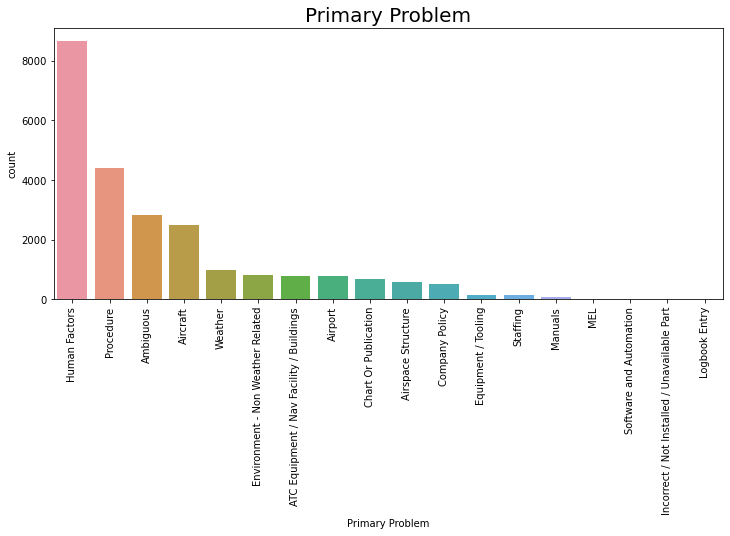

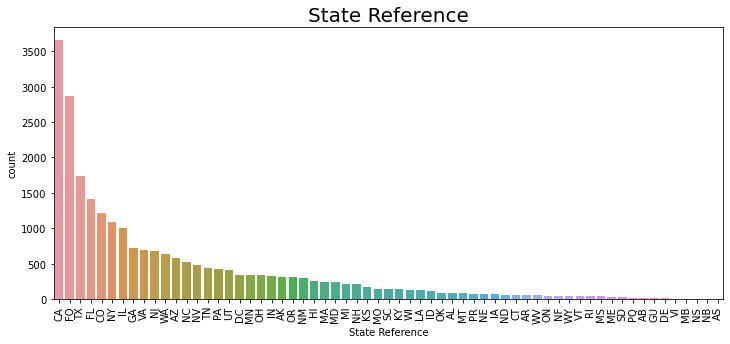

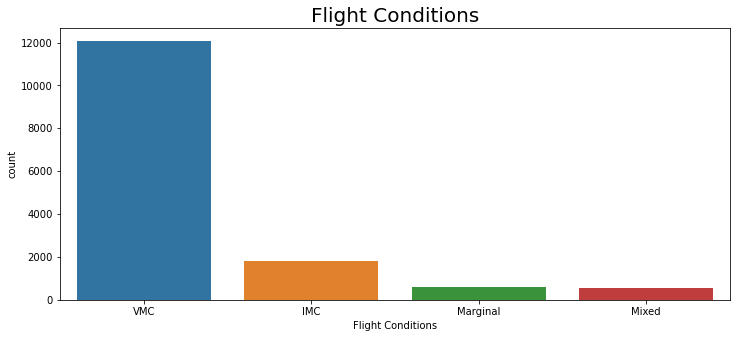

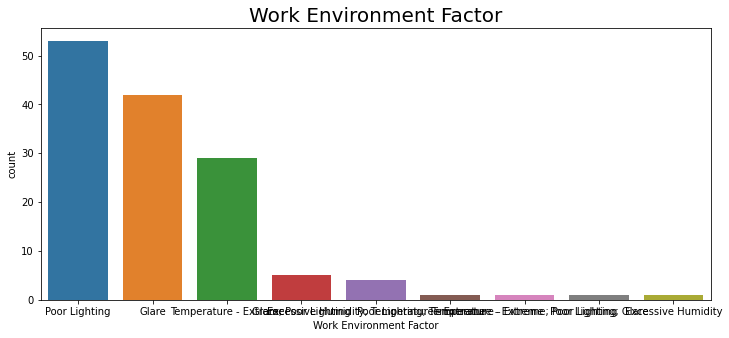

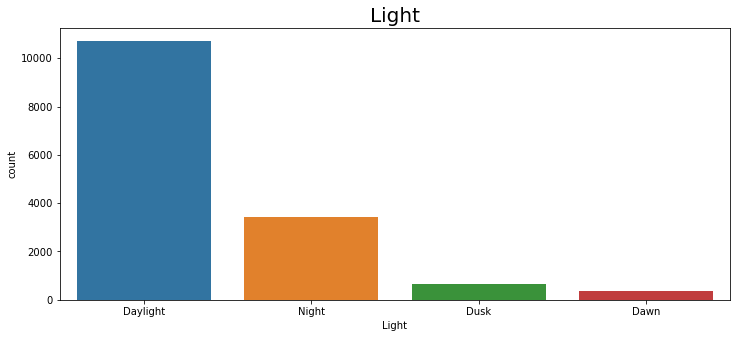

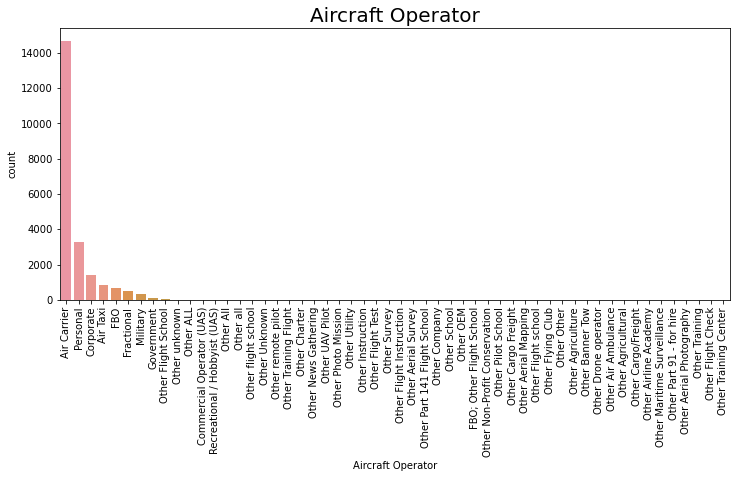

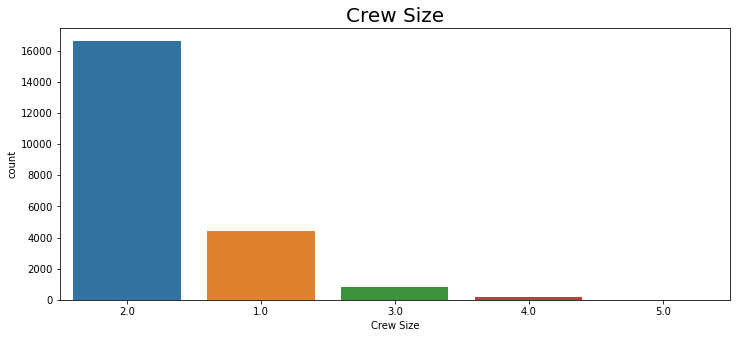

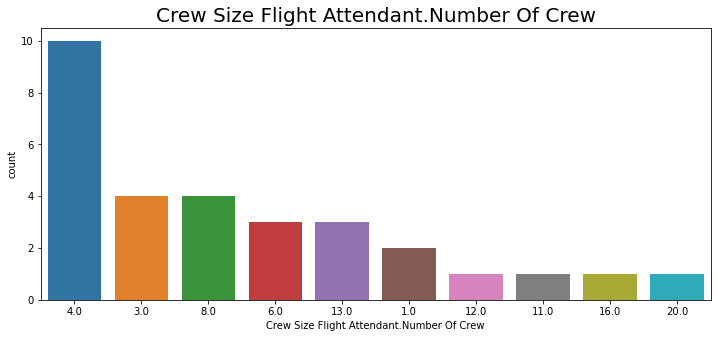

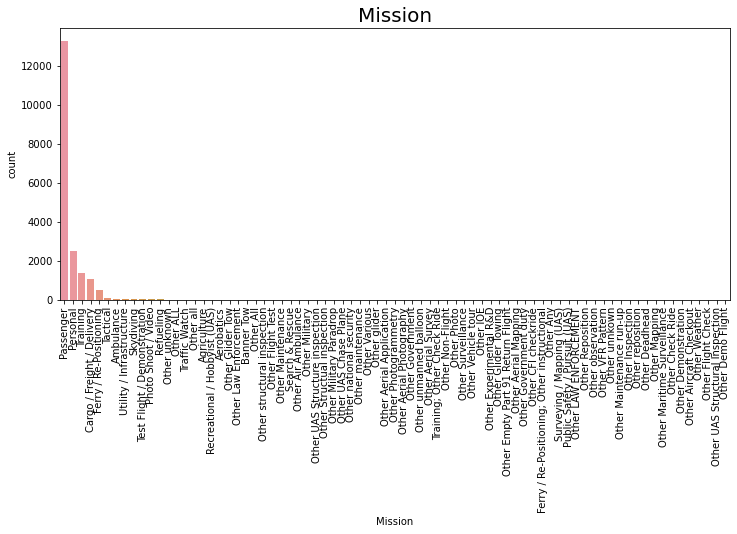

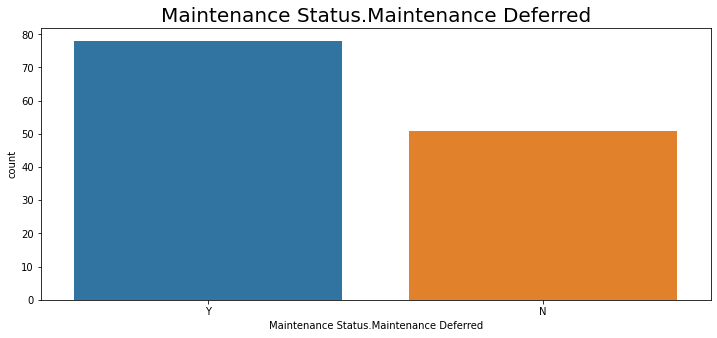

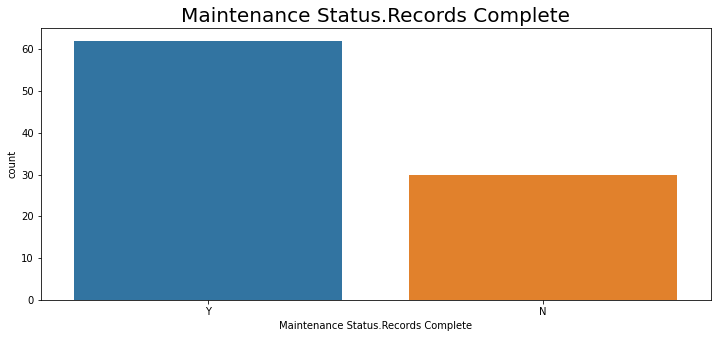

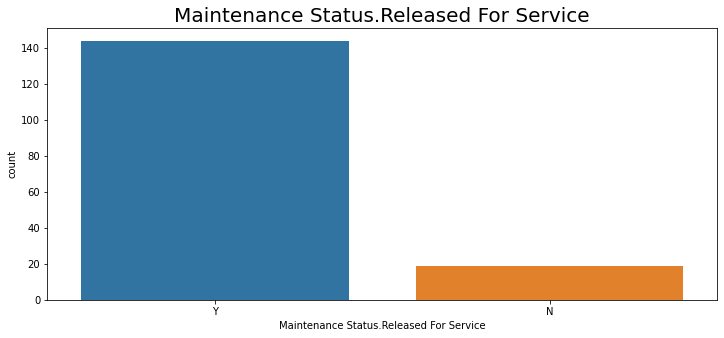

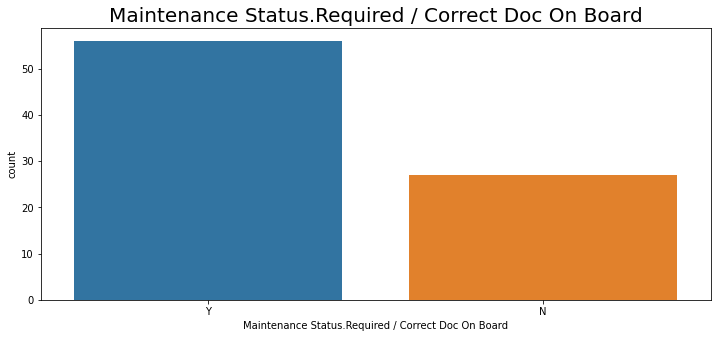

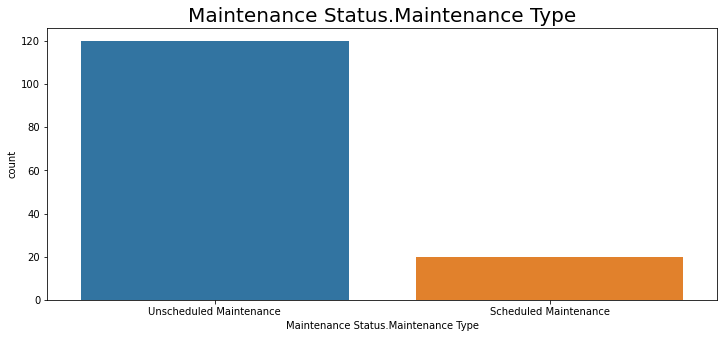

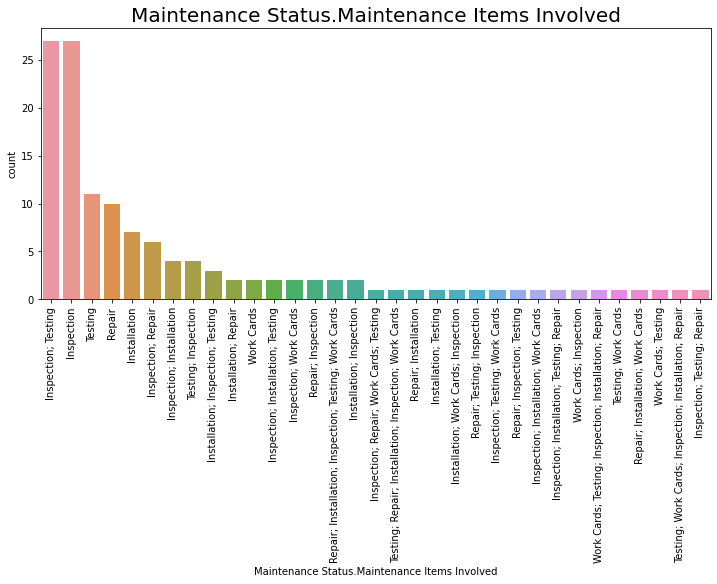

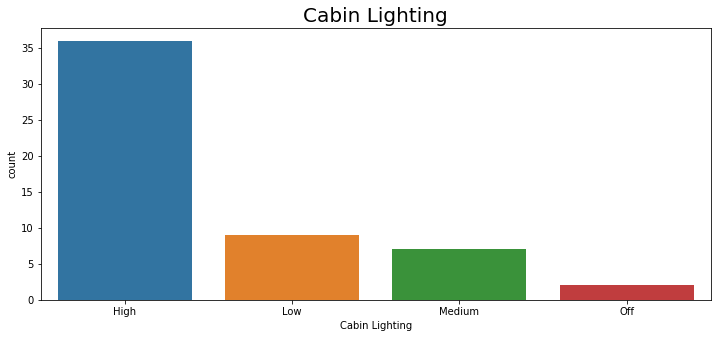

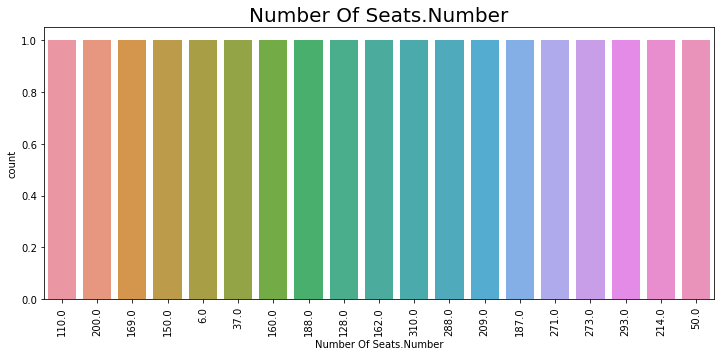

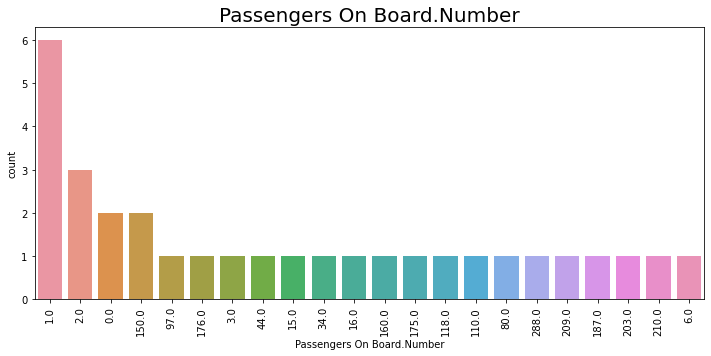

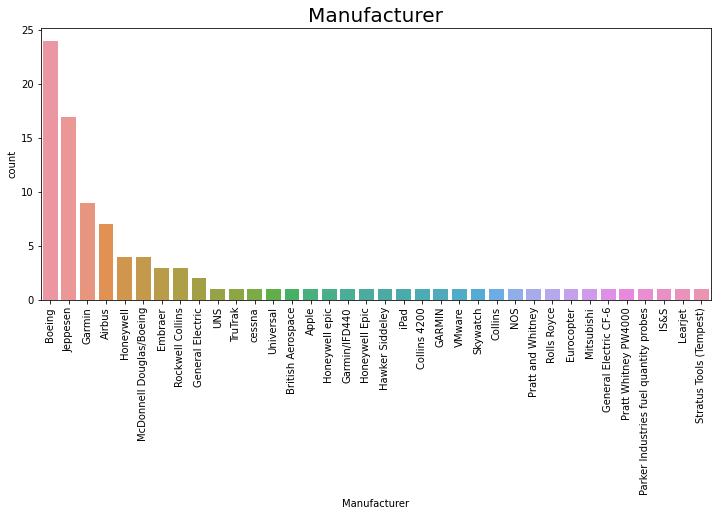

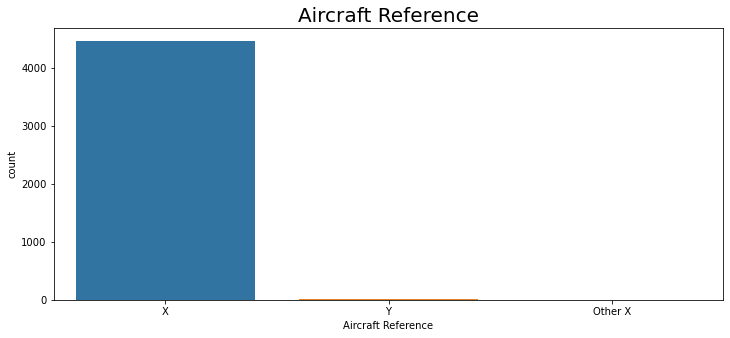

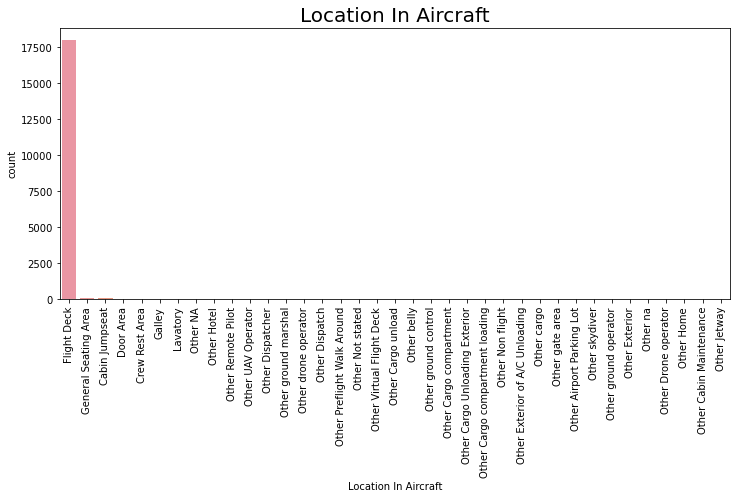

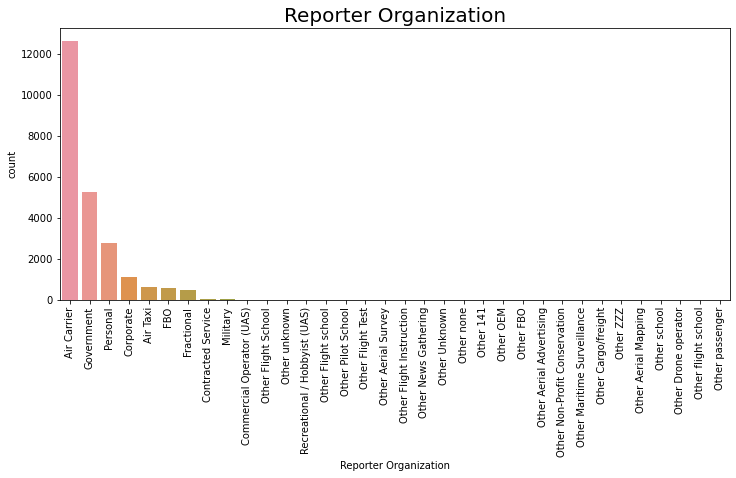

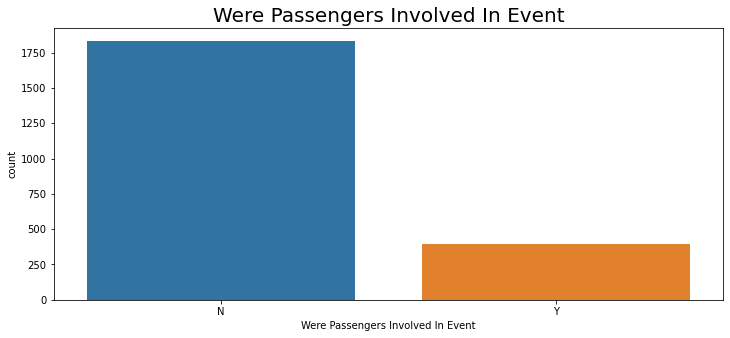

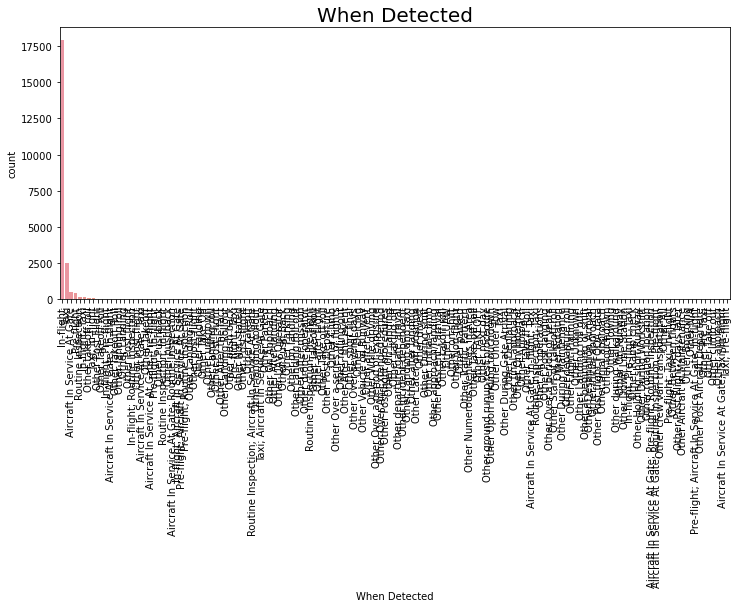

In [314]:
# Call the function        
plot_feats_countplt(features_manned)

### INSIGHTS 

#### /!\  NaNs are not included in the plots !

- 'manufacturer' included 'iPad' or 'GARMIN' --> these refer to electronic equipment rather than aircraft

##### Examine 'Communication Breakdown' feature

In [315]:
list(df[df['Communication Breakdown'] == 'Party1 Flight Crew; Party2 Dispatch; Party2 Other']['Contributing Factors / Situations'])

['Weather; Human Factors; Company Policy; Airport',
 'Human Factors',
 'Human Factors',
 'Procedure']

### Features related to unmanned aerial systems (UAS)

A UAS (Unmanned Aircraft Systems) includes not only the UAV (or drone), but also the person on the ground controlling the flight and the system in place that connects both of them.

#### Find out how many UAS-entries we have

In [316]:
features_UAS_all = [
###################################
### FEATURES RELATED TO DRONES  ###
###################################
 'Latitude / Longitude (UAS)',
    'Operating Under Waivers / Exemptions / Authorizations (UAS)',
  'Waivers / Exemptions / Authorizations (UAS)',
  'Airworthiness Certification (UAS)', # Only 'Standard' value
  'Weight Category (UAS)',
  'Configuration (UAS)',
  'Flight Operated As (UAS)',
  'Flight Operated with Visual Observer (UAS)', # BVLOS (Beyond Visual Line of Sight) is a term relating to the operation of UAVs (unmanned aerial vehicles) and drones at distances outside the normal visible range of the pilot.
 'Control Mode (UAS)',
 'Flying In / Near / Over (UAS)',
 'Passenger Capable (UAS)', # There are only NaNs and 'N'
 'Type (UAS)',
 'Number of UAS Being Controlled (UAS)',
 'UAS Communication Breakdown',    
 'Airspace Authorization Provider (UAS)', # only NaN's in this feature --> drop ?

    
##################################################
### Additional entries for the above variables ###
##################################################
 'Airspace Authorization Provider (UAS).1',
 'Operating Under Waivers / Exemptions / Authorizations (UAS).1',
 'Waivers / Exemptions / Authorizations (UAS).1',
 'Airworthiness Certification (UAS).1',
 'Weight Category (UAS).1',
 'Configuration (UAS).1',
 'Flight Operated As (UAS).1',
 'Flight Operated with Visual Observer (UAS).1',
 'Control Mode (UAS).1',
 'Flying In / Near / Over (UAS).1',
 'Passenger Capable (UAS).1',
 'Type (UAS).1',
 'Number of UAS Being Controlled (UAS).1',    
##################################################
]

In [317]:
# Search and gather the rows that contain non-nan values for any of the UAS features into dataframes

files = [] # instantiate empty list

for feat in features_UAS_all:
    
    # append pandas DataFrames to 'files' --> files becomes list of df's.
    files.append(df.loc[df[feat].isna() == False])

# concatenate df's into 1 df:
df_UAS = pd.concat(files)

# Drop the duplicates; there definitely exist many, because we searched column-by-column
df_UAS = df_UAS.drop_duplicates(keep= 'first')

In [318]:
print("The data contain", len(df_UAS), "UAS-related entries.")

The data contain 88 UAS-related entries.


This quantity of UAS entries seems reasonable, because these data have NaN's in many MANNED-aircraft-related features, as shown in the next line. Note that 'Make Model Name' has no NaNs.

In [319]:
df_UAS.isna().sum()

ACN                                                               0
Date                                                              0
Local Time Of Day                                                10
Locale Reference                                                  1
State Reference                                                   0
Relative Position.Angle.Radial                                   69
Relative Position.Distance.Nautical Miles                        46
Altitude.AGL.Single Value                                        54
Altitude.MSL.Single Value                                        42
Latitude / Longitude (UAS)                                       88
Flight Conditions                                                 9
Weather Elements / Visibility                                    43
Work Environment Factor                                          87
Light                                                            36
Ceiling                                         

In [320]:
df_UAS.head(3)

,ACN,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),Flight Conditions,Weather Elements / Visibility,Work Environment Factor,Light,Ceiling,RVR.Single Value,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On Board,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Airspace Authorization Provider (UAS),Operating Under Waivers / Exemptions / Authorizations (UAS),Waivers / Exemptions / Authorizations (UAS),Airworthiness Certification (UAS),Weight Category (UAS),Configuration (UAS),Flight Operated As (UAS),Flight Operated with Visual Observer (UAS),Control Mode (UAS),Flying In / Near / Over (UAS),Passenger Capable (UAS),Type (UAS),Number of UAS Being Controlled (UAS),Aircraft Component,Manufacturer,Aircraft Reference,Problem,ATC / Advisory.1,Aircraft Operator.1,Make Model Name.1,Aircraft Zone.1,Crew Size.1,Operating Under FAR Part.1,Flight Plan.1,Mission.1,Nav In Use.1,Flight Phase.1,Route In Use.1,Airspace.1,Maintenance Status.Maintenance Deferred.1,Maintenance Status.Records Complete.1,Maintenance Status.Released For Service.1,Maintenance Status.Required / Correct Doc On Board.1,Maintenance Status.Maintenance Type.1,Maintenance Status.Maintenance Items Involved.1,Cabin Lighting.1,Number Of Seats.Number.1,Passengers On Board.Number.1,Crew Size Flight Attendant.Number Of Crew.1,Airspace Authorization Provider (UAS).1,Operating Under Waivers / Exemptions / Authorizations (UAS).1,Waivers / Exemptions / Authorizations (UAS).1,Airworthiness Certification (UAS).1,Weight Category (UAS).1,Configuration (UAS).1,Flight Operated As (UAS).1,Flight Operated with Visual Observer (UAS).1,Control Mode (UAS).1,Flying In / Near / Over (UAS).1,Passenger Capable (UAS).1,Type (UAS).1,Number of UAS Being Controlled (UAS).1,Location Of Person,Location In Aircraft,Reporter Organization,Function,Qualification,Experience,Cabin Activity,Human Factors,Communication Breakdown,UAS Communication Breakdown,ASRS Report Number.Accession Number,Location Of Person.1,Location In Aircraft.1,Reporter Organization.1,Function.1,Qualification.1,Experience.1,Cabin Activity.1,Human Factors.1,Communication Breakdown.1,UAS Communication Breakdown.1,ASRS Report Number.Accession Number.1,Anomaly,Miss Distance,Were Passengers Involved In Event,Detector,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative.1,Callback.1,Synopsis,Unnamed: 125
1021,1806950,202105,0601-1200,LUF.Airport,AZ,NaN,10.0,400.0,NaN,NaN,NaN,10,NaN,Daylight,CLR,NaN,NaN,Commercial Operator (UAS),DJI Phantom 4 Pro,NaN,1.0,Part 107,None,Surveying / Mapping (UAS),NaN,Hovering (UAS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,Small,Multi-Rotor,VLOS,NaN,Manual Control,Aircraft / UAS; Open Space / Field; No Drone Zone,NaN,Purchased,Number of UAS 1,NaN,NaN,NaN,NaN,NaN,Military,Fighter,NaN,NaN,NaN,NaN,Training,NaN,NaN,NaN,Special Use ALERT AREA A-231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor / Field Station (UAS),NaN,Commercial Operator (UAS),Remote PIC (UAS); Person Manipulating Controls...,Flight Crew Remote Pilot (UAS),Flight Crew Last 90 Days (UAS) 25.5; Flight Cr...,NaN,Training / Qualification; Situational Awarenes...,NaN,NaN,1806950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conflict Airborne Conflict,Horizontal 500; Vertical 500,NaN,Person UAS Crew,In-flight,Flight Crew Took Evasive Action,Human Factors; Chart Or Publication,Ambi

#### Plot UAS features

In [321]:
features_UAS_to_plot = [
###################################
### FEATURES RELATED TO DRONES  ###
###################################
# 'Latitude / Longitude (UAS)',
    'Operating Under Waivers / Exemptions / Authorizations (UAS)',
  'Waivers / Exemptions / Authorizations (UAS)',
#  'Airworthiness Certification (UAS)', # Only 'Standard' value
  'Weight Category (UAS)',
  'Configuration (UAS)',
  'Flight Operated As (UAS)',
  'Flight Operated with Visual Observer (UAS)', # BVLOS (Beyond Visual Line of Sight) is a term relating to the operation of UAVs (unmanned aerial vehicles) and drones at distances outside the normal visible range of the pilot.
#  'Control Mode (UAS)',
#  'Flying In / Near / Over (UAS)',
#  'Passenger Capable (UAS)', # There are only NaNs and 'N'
#  'Type (UAS)',
#  'Number of UAS Being Controlled (UAS)',
#  'UAS Communication Breakdown',    
#  'Airspace Authorization Provider (UAS)', # only NaN's in this feature --> drop ?

    
##################################################
### Additional entries for the above variables ###
##################################################
#  'Airspace Authorization Provider (UAS).1',
#  'Operating Under Waivers / Exemptions / Authorizations (UAS).1',
#  'Waivers / Exemptions / Authorizations (UAS).1',
#  'Airworthiness Certification (UAS).1',
#  'Weight Category (UAS).1',
#  'Configuration (UAS).1',
#  'Flight Operated As (UAS).1',
#  'Flight Operated with Visual Observer (UAS).1',
#  'Control Mode (UAS).1',
#  'Flying In / Near / Over (UAS).1',
#  'Passenger Capable (UAS).1',
#  'Type (UAS).1',
#  'Number of UAS Being Controlled (UAS).1',    
##################################################
]

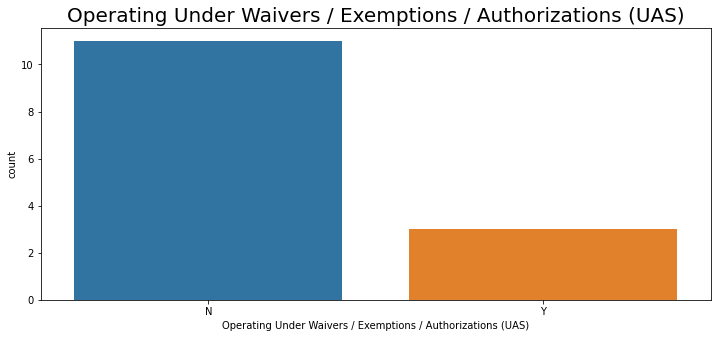

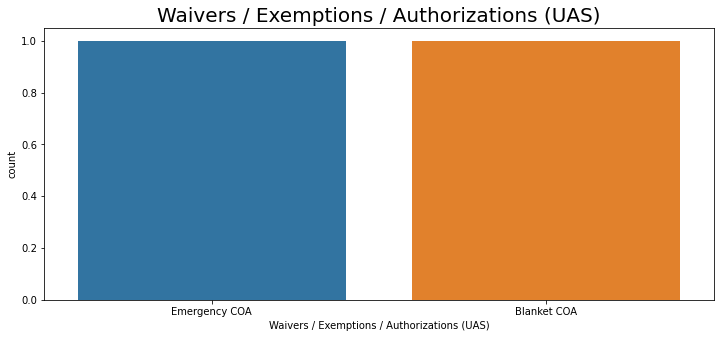

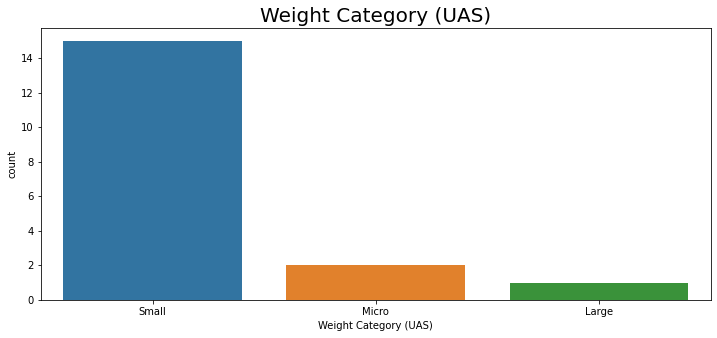

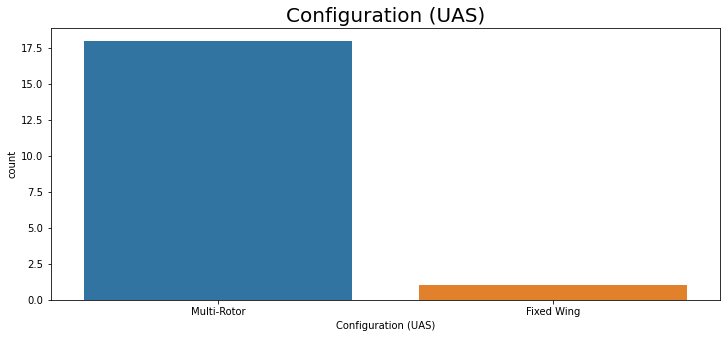

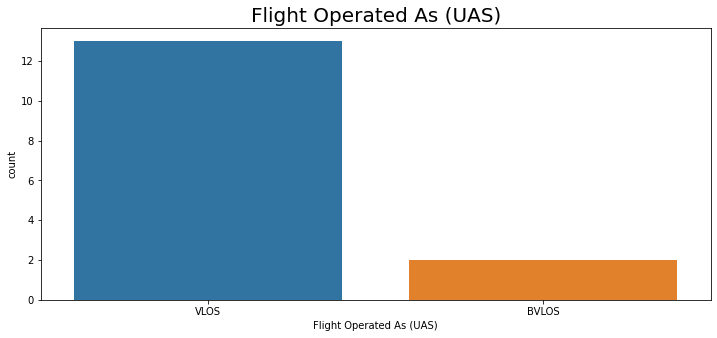

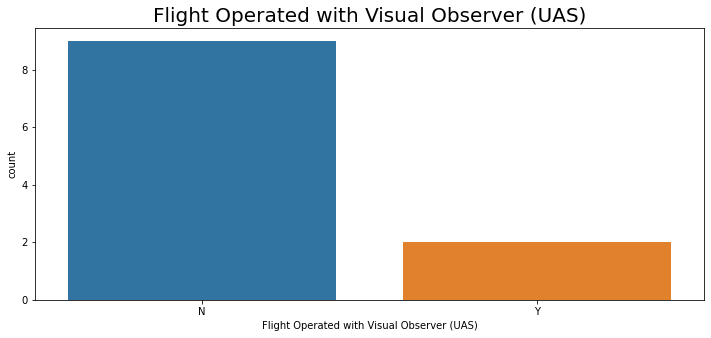

In [322]:
plot_feats_countplt(features_UAS_to_plot)

# IDEAS 

- bin the features that have many different values ?
- do a plot with Bokeh on a US map that shows the numbers of events wrt state and/or 'Latitude / Longitude (UAS)'. Caution : the last applies to drones.

#### Examine text variables
- <strike> tokenize, filter stop words for the narratives, and synopsis </strike>
- <strike> create a word cloud, word histogram for the narratives, and synopsis </strike>
- do a word histogramm on all narratives simultaneously
- examine similarity between two narratives (voir module 133? de text summarization)


## Remove all UAS-related entries

In [323]:
# remove rows
df = df.drop(df_UAS.index, axis = 0)

In [324]:
# Check: 
len(df) + 88

24063

In [364]:
# remove UAS-columns
df = df.drop(columns= features_UAS_all)

## Find out which features we may use as labels for the narratives

#### 'Problem'

In [325]:
list(df['Problem'].unique())

[nan,
 'Improperly Operated',
 'Design; Improperly Operated',
 'Malfunctioning; Design',
 'Design',
 'Malfunctioning',
 'Failed',
 'Improperly Operated; Design',
 'Design; Improperly Operated; Malfunctioning',
 'Improperly Operated; Malfunctioning',
 'Improperly Operated; Failed',
 'Malfunctioning; Improperly Operated',
 'Design; Malfunctioning',
 'Failed; Malfunctioning',
 'Malfunctioning; Failed',
 'Design; Malfunctioning; Improperly Operated',
 'Failed; Improperly Operated',
 'Design; Failed',
 'Failed; Improperly Operated; Malfunctioning',
 'Improperly Operated; Malfunctioning; Design',
 'Failed; Design',
 'Improperly Operated; Failed; Malfunctioning',
 'Design; Failed; Malfunctioning']

In [326]:
print('out of', df['Problem'].isna().count(), 'entries', ', we have', df['Problem'].isna().sum(), "NaN's for 'Problem'")
print("Hence, it is not a good label for our data.")

out of 23975 entries , we have 19698 NaN's for 'Problem'
Hence, it is not a good label for our data.


### Examine the most common 'Contributing Factors / Situations' per 'Primary Problem'

In [327]:
print("There are", df.isna().sum()['Primary Problem'], "entries with Primary Problem == NaN.")

There are 95 entries with Primary Problem == NaN.


In [328]:
# List of all Primary Problems in the dataset
# exclude the entries, where 'Primary Problem is NaN'
prim_probs = list(df[df['Primary Problem'].isna() == False]['Primary Problem'].unique())

In [329]:
print("The list of 'Primary Problems' in our dataset:")
prim_probs

The list of 'Primary Problems' in our dataset:


['Human Factors',
 'Aircraft',
 'Airport',
 'Procedure',
 'Ambiguous',
 'Environment - Non Weather Related',
 'Company Policy',
 'Chart Or Publication',
 'ATC Equipment / Nav Facility / Buildings',
 'Airspace Structure',
 'Weather',
 'Equipment / Tooling',
 'Manuals',
 'Staffing',
 'MEL',
 'Software and Automation',
 'Incorrect / Not Installed / Unavailable Part',
 'Logbook Entry']


There are 8628 issues with Human Factors being the Primary Problem.
Among the 8628 issues with Human Factors being the Primary Problem, there are 0 NaN's under 'Contributing Factors / Situations'.

There are 2474 issues with Aircraft being the Primary Problem.
Among the 2474 issues with Aircraft being the Primary Problem, there are 0 NaN's under 'Contributing Factors / Situations'.

There are 776 issues with Airport being the Primary Problem.
Among the 776 issues with Airport being the Primary Problem, there are 0 NaN's under 'Contributing Factors / Situations'.

There are 4409 issues with Procedure being the Primary Problem.
Among the 4409 issues with Procedure being the Primary Problem, there are 0 NaN's under 'Contributing Factors / Situations'.

There are 2819 issues with Ambiguous being the Primary Problem.
Among the 2819 issues with Ambiguous being the Primary Problem, there are 0 NaN's under 'Contributing Factors / Situations'.

There are 801 issues with Environment - Non Weath

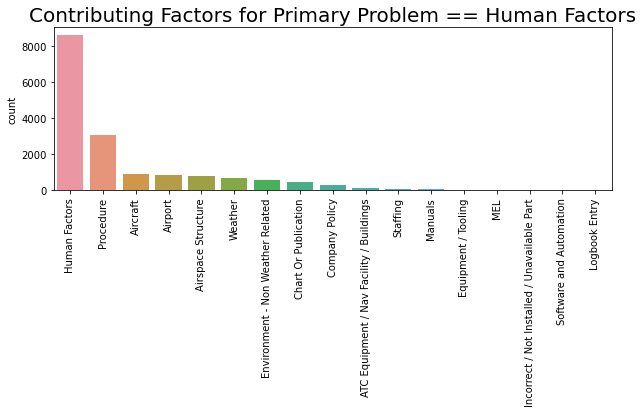

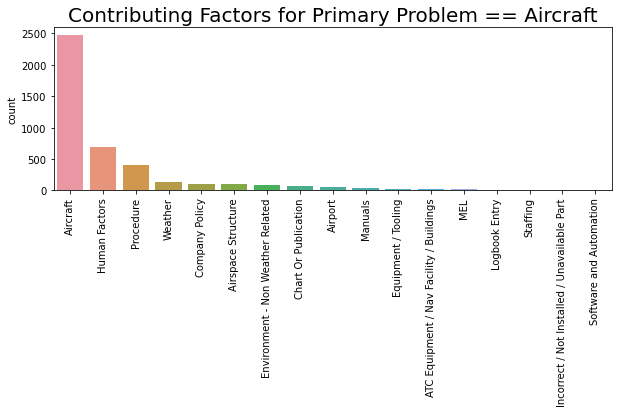

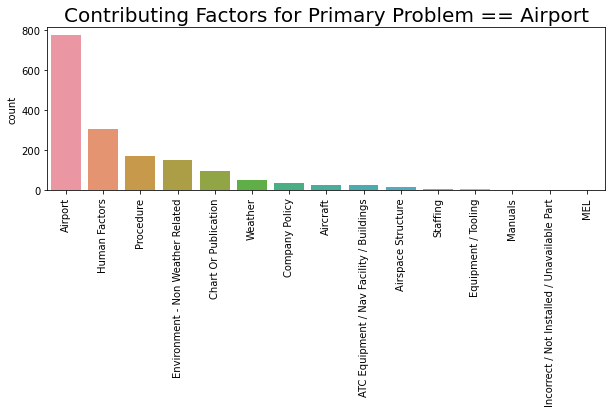

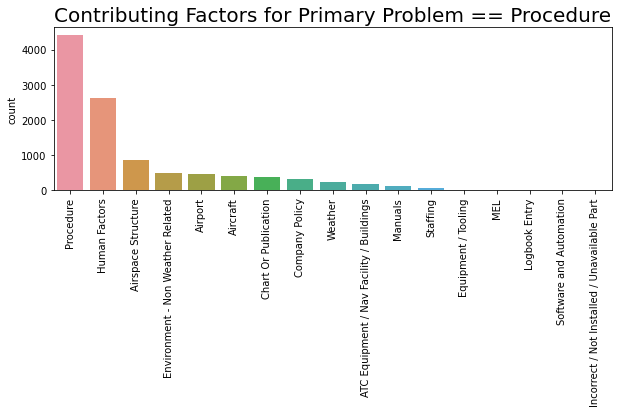

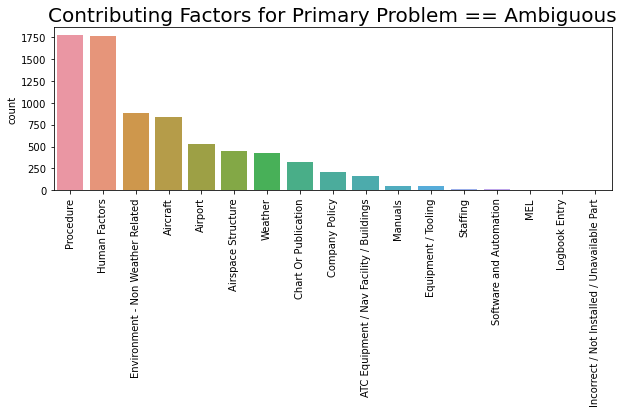

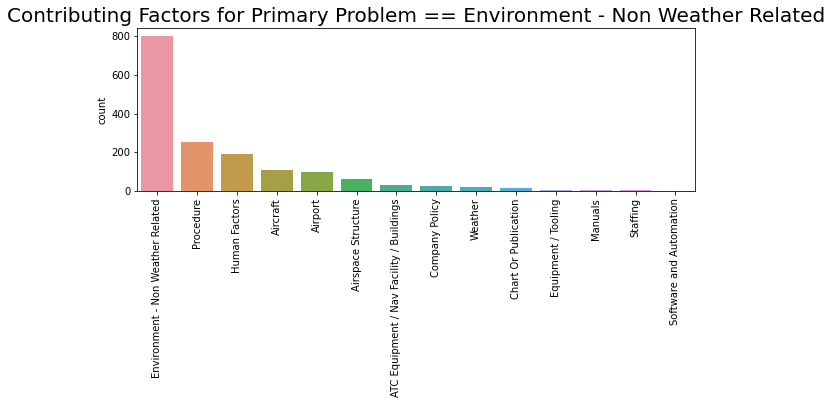

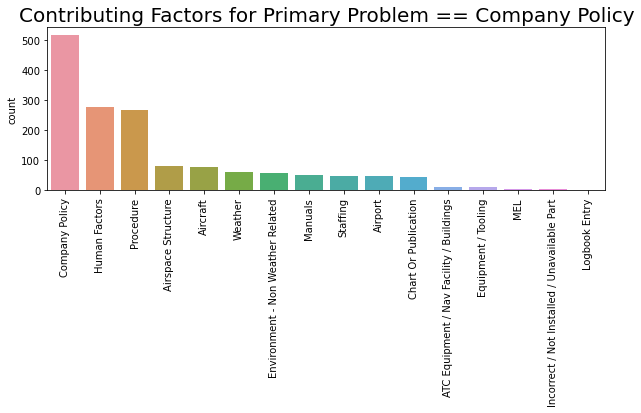

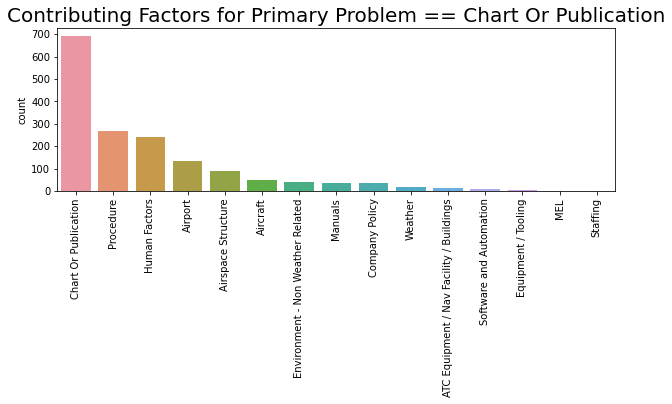

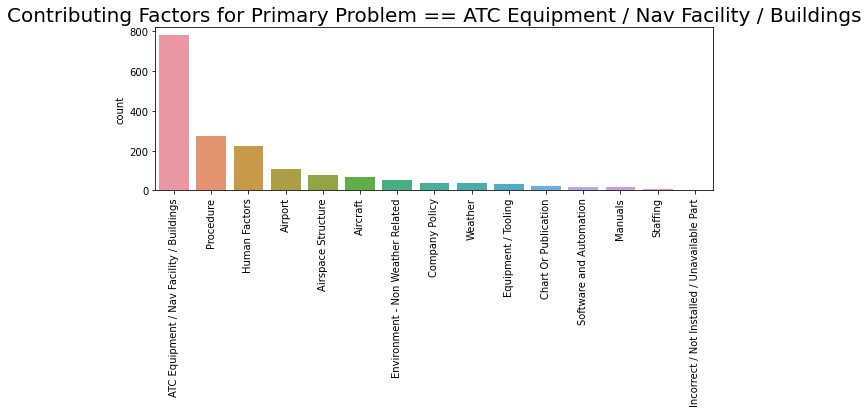

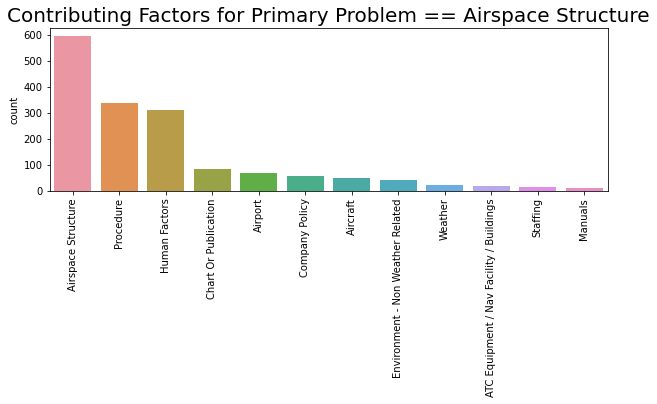

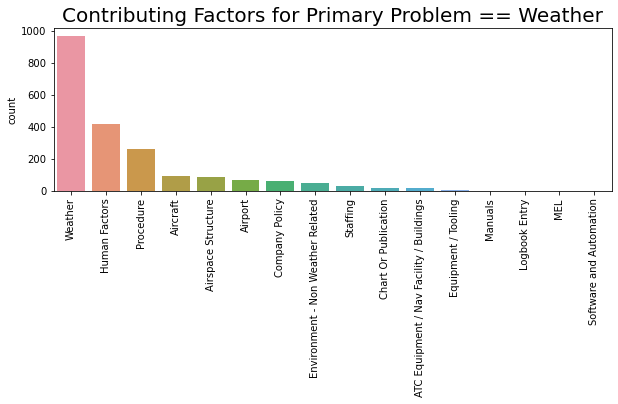

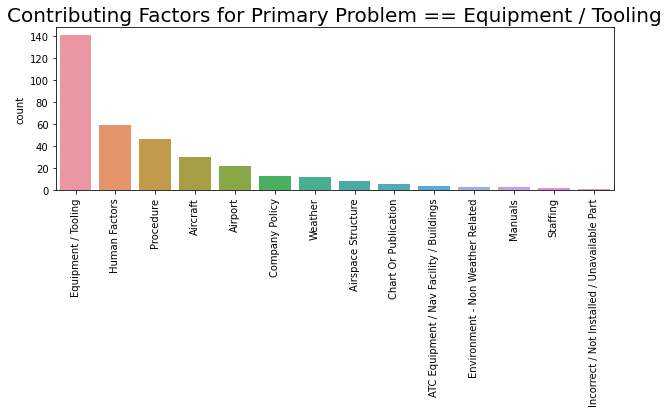

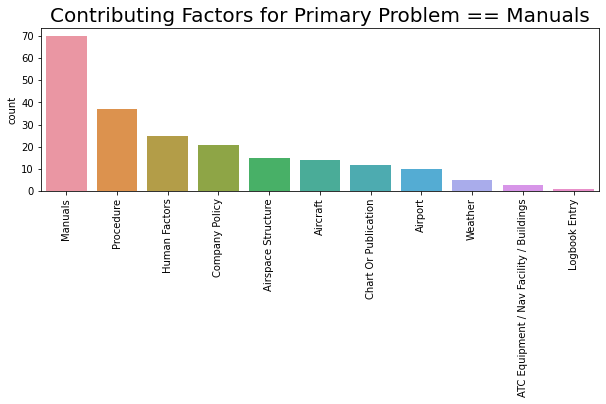

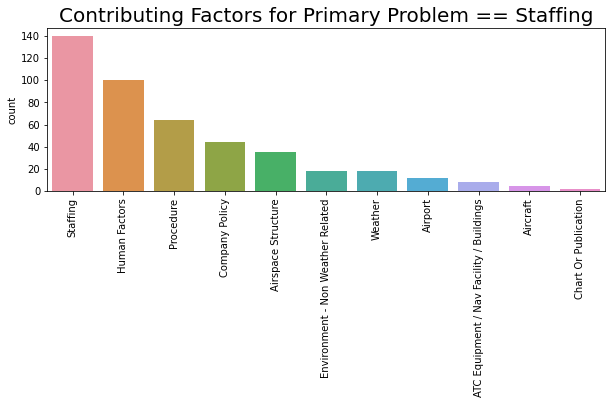

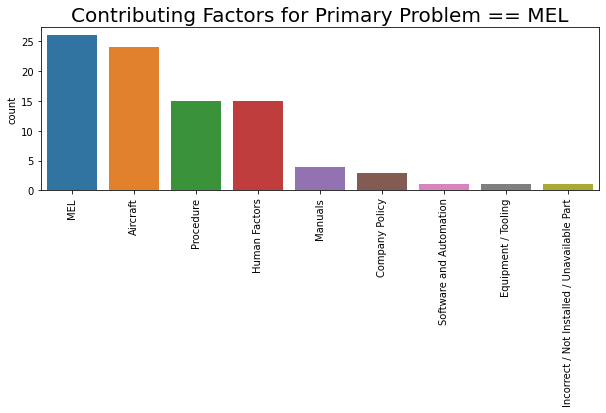

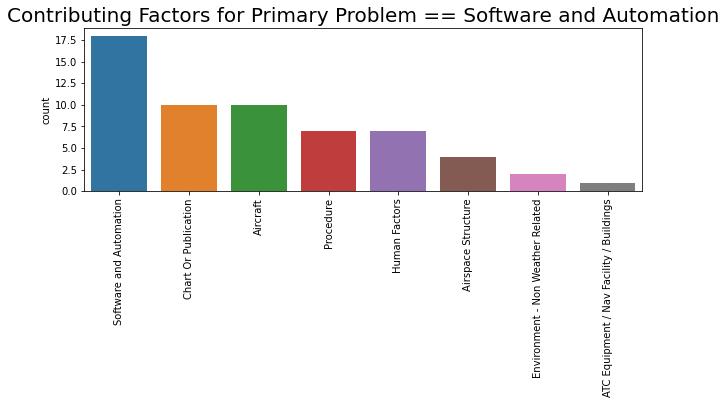

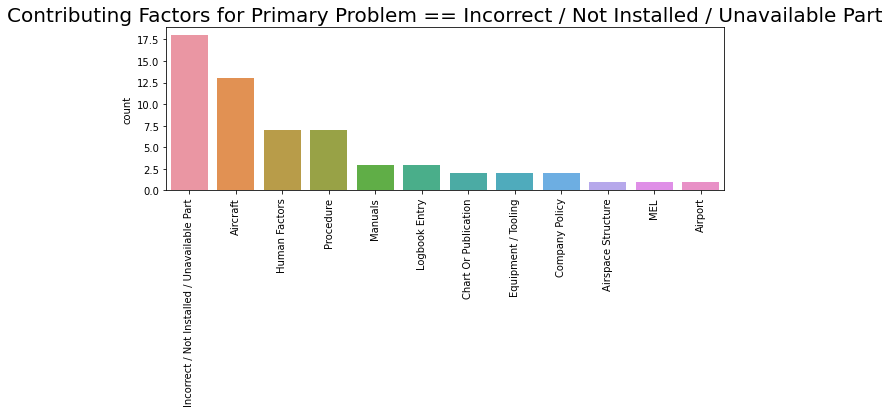

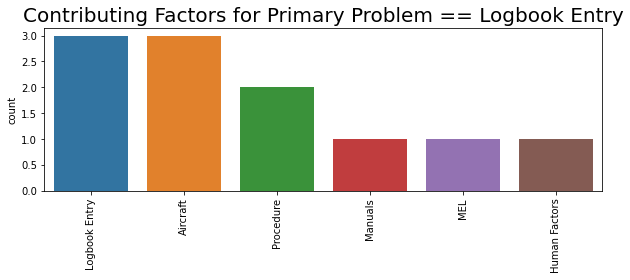

In [330]:
#plt.rcParams.update({'figure.max_open_warning': 0});

for problem in prim_probs:
    
    # Select the data corresponding to a particular Primary Problem
    df_prob = df[df['Primary Problem'] == problem]
    
    print("\nThere are", len(df_prob), "issues with", problem, "being the Primary Problem.")
    print("Among the", len(df_prob), "issues with", problem, "being the Primary Problem, there are", 
          df_prob["Contributing Factors / Situations"].isna().sum(), "NaN's under 'Contributing Factors / Situations'.")
    
    # Make a list of all Contributing Factors for a given Primary Problem:
    cf = list()
    for contr_fact in df_prob['Contributing Factors / Situations']:
        split = contr_fact.split(sep = '; ') # include a space after ';'
        cf = cf + split
        
    #print("For", problem, "the contributing factors are:", set(cf))
    
    # Countplot for the Contributing Factors
    fig = plt.figure(figsize= (10,3))
    sns.countplot(x = cf, order= pd.Series(cf).value_counts().index) # need to transform list to pd.Series for the ordering in countplot()
    plt.xticks(rotation=90)
    plt.title('Contributing Factors for Primary Problem == ' + problem, fontsize=20);

### 'Anomaly'

In [331]:
list(df['Anomaly'].unique())

['Deviation - Altitude Excursion From Assigned Altitude; Deviation / Discrepancy - Procedural Published Material / Policy; Deviation / Discrepancy - Procedural Clearance',
 'ATC Issue All Types; Deviation / Discrepancy - Procedural Published Material / Policy',
 'Deviation - Altitude Crossing Restriction Not Met; Deviation / Discrepancy - Procedural Published Material / Policy; Deviation / Discrepancy - Procedural Clearance',
 'Conflict Ground Conflict; Critical; Deviation / Discrepancy - Procedural Clearance; Ground Incursion Taxiway',
 'Inflight Event / Encounter CFTT / CFIT; Inflight Event / Encounter VFR In IMC; Inflight Event / Encounter Weather / Turbulence',
 'Conflict Airborne Conflict; Deviation - Altitude Excursion From Assigned Altitude',
 'Conflict NMAC',
 'Conflict NMAC; Deviation / Discrepancy - Procedural Published Material / Policy',
 'Inflight Event / Encounter Other / Unknown',
 'Inflight Event / Encounter CFTT / CFIT; Inflight Event / Encounter Unstabilized Approach'

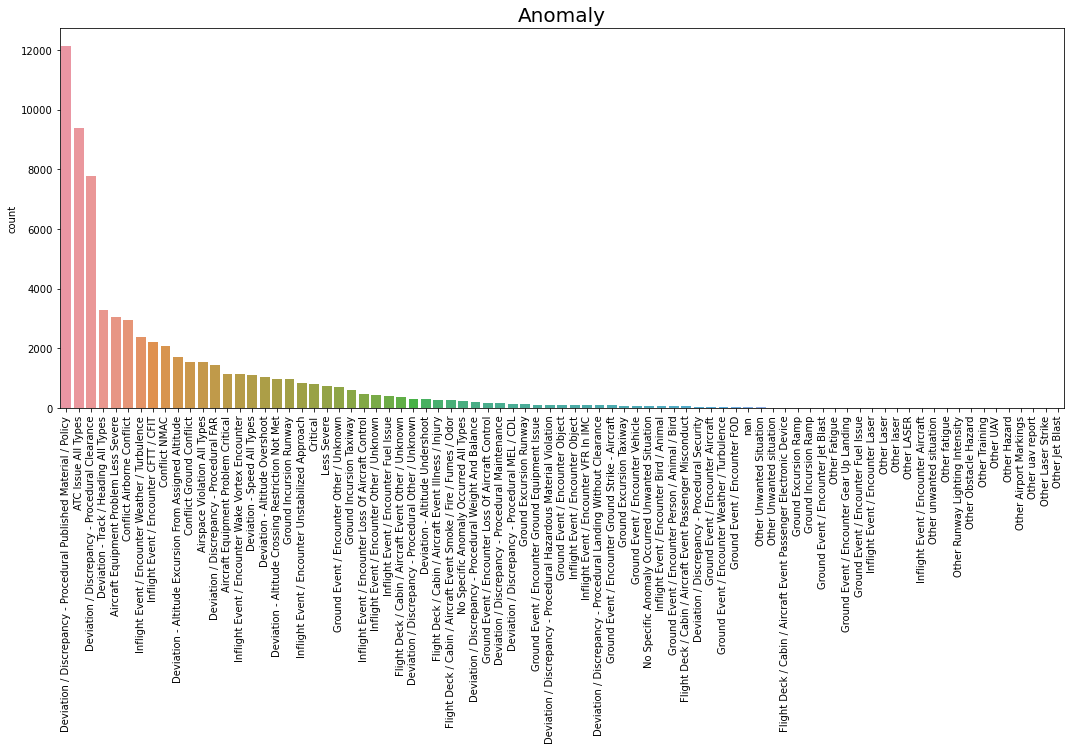

In [332]:
# Make a list of all Anomaly entries
anomalies = list()
for entry in df['Anomaly']:
    split = str(entry).split(sep = '; ') # include a space after ';'
    anomalies = anomalies + split

# Countplot for Anomaly:
fig = plt.figure(figsize= (18,7))

sns.countplot(x = anomalies, order= pd.Series(anomalies).value_counts().index) # need to transform list to pd.Series for the ordering in countplot()
plt.xticks(rotation=90)
plt.title('Anomaly', fontsize=20);

### Is 'Anomaly' the label our robot should corretly label the narratives with...? 

Note: 

- each narrative can be labelled with several anomalies

### 'Human Factors'

There is a top-level feature in the dataset referring to the 'Human Factors' in more detail.

In [333]:
len(df["Human Factors"])

23975

In [334]:
print("From a total of", len(df["Human Factors"]), "entries, there are", df['Human Factors'].isna().sum(), "non-NaN entries.")

From a total of 23975 entries, there are 3981 non-NaN entries.


In [335]:
list(df['Human Factors'].unique())

['Situational Awareness',
 'Situational Awareness; Workload; Human-Machine Interface; Communication Breakdown; Confusion',
 'Confusion; Situational Awareness',
 'Situational Awareness; Training / Qualification',
 'Other / Unknown',
 nan,
 'Situational Awareness; Distraction; Time Pressure; Communication Breakdown',
 'Communication Breakdown',
 'Training / Qualification; Situational Awareness',
 'Distraction; Situational Awareness; Workload',
 'Communication Breakdown; Situational Awareness; Confusion',
 'Situational Awareness; Training / Qualification; Confusion',
 'Communication Breakdown; Confusion; Situational Awareness',
 'Distraction; Situational Awareness; Confusion',
 'Communication Breakdown; Other / Unknown',
 'Communication Breakdown; Situational Awareness',
 'Training / Qualification; Situational Awareness; Human-Machine Interface; Time Pressure',
 'Time Pressure; Physiological - Other; Distraction; Confusion; Situational Awareness',
 'Human-Machine Interface',
 'Situational

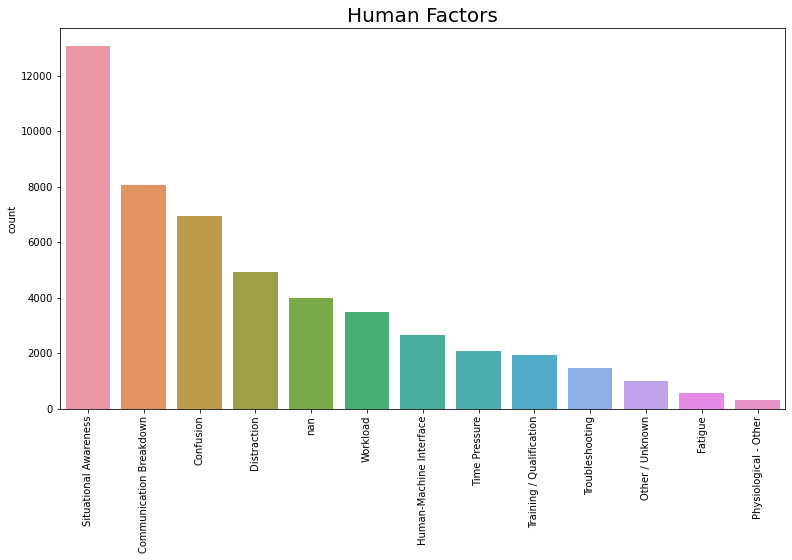

In [336]:
# Make a list of all 'Human Factor' entries
hum_facts = list()
for entry in df['Human Factors']:
    split = str(entry).split(sep = '; ') # include a space after ';'
    hum_facts = hum_facts + split

# Countplot:
fig = plt.figure(figsize= (13,7))

sns.countplot(x = hum_facts, order= pd.Series(hum_facts).value_counts().index) # need to transform list to pd.Series for the ordering in countplot()
plt.xticks(rotation=90)
plt.title('Human Factors', fontsize=20);

### These 'Human Factor' entries are also interesting and challenging labels that our robot should corretly label the narratives with 


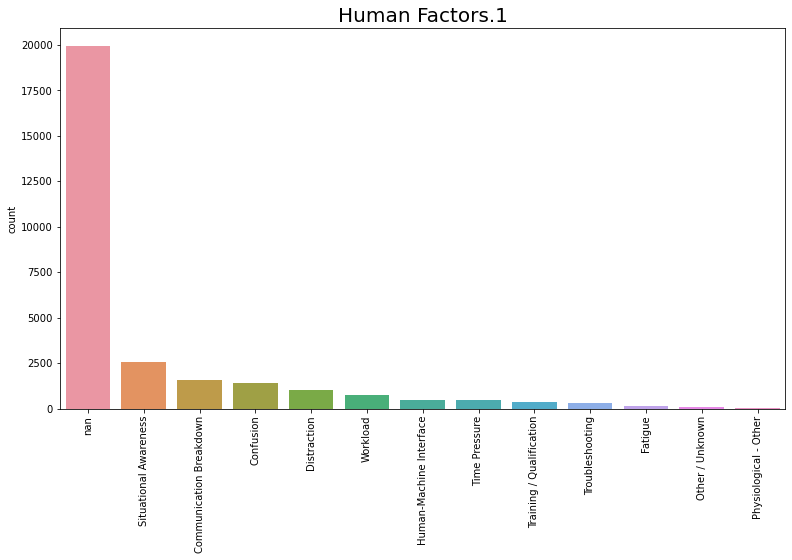

In [337]:
# Make a list of all 'Human Factor.1' entries
hum_facts = list()
for entry in df['Human Factors.1']:
    split = str(entry).split(sep = '; ') # include a space after ';'
    hum_facts = hum_facts + split

# Countplot:
fig = plt.figure(figsize= (13,7))

sns.countplot(x = hum_facts, order= pd.Series(hum_facts).value_counts().index) # need to transform list to pd.Series for the ordering in countplot()
plt.xticks(rotation=90)
plt.title('Human Factors.1', fontsize=20);

The 'Human Factors.1' follow the same hierarchy as the 'Human Factors' entries (except nan). 


### 'Function'

In [338]:
list(df['Function'].unique())

['Departure; Approach',
 'Enroute',
 'Pilot Flying; First Officer',
 'Ground',
 'Single Pilot',
 'Approach; Departure',
 'Pilot Not Flying; Instructor',
 'Captain; Pilot Not Flying',
 'Pilot Flying',
 'Pilot Not Flying; Captain',
 'First Officer; Pilot Not Flying',
 'Captain; Pilot Flying',
 'Pilot Flying; Captain',
 'Local',
 'Pilot Not Flying; First Officer',
 'First Officer',
 'Instructor; Pilot Not Flying',
 'Single Pilot; Pilot Flying',
 'Instructor; Pilot Flying',
 'First Officer; Pilot Flying',
 'Ground; Supervisor / CIC',
 'Captain',
 'Pilot Flying; Single Pilot',
 nan,
 'Pilot Not Flying; Relief Pilot',
 'Pilot Not Flying',
 'Flight Service',
 'Pilot Flying; Trainee',
 'Captain; Instructor',
 'Pilot Not Flying; Check Pilot; Captain',
 'Instructor',
 'Pilot Not Flying; Instructor; Captain',
 'Other / Unknown',
 'Pilot Flying; Instructor',
 'Traffic Management',
 'Check Pilot; Instructor',
 'Supervisor / CIC',
 'Captain; Single Pilot',
 'Enroute; Handoff / Assist',
 'Departure',

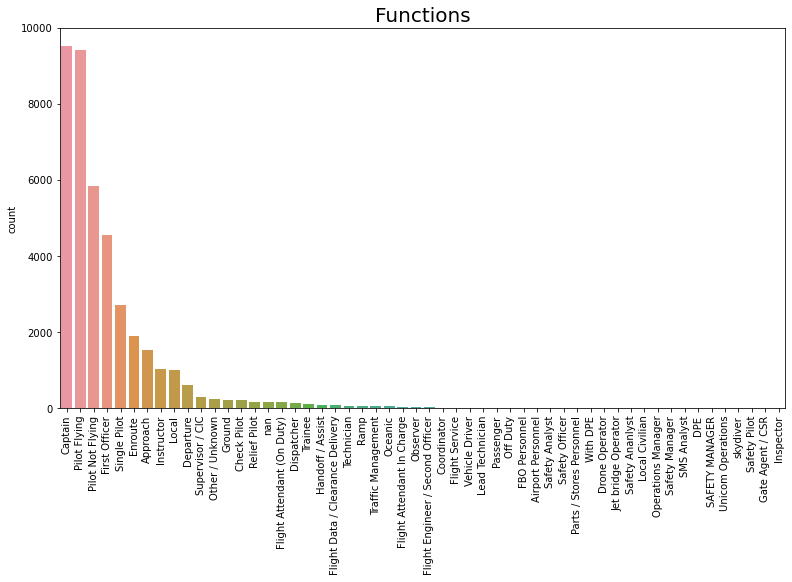

In [339]:
# Make a list of all 'Function' entries
functions = list()
for entry in df['Function']:
    split = str(entry).split(sep = '; ') # include a space after ';'
    functions = functions + split

# Countplot:
fig = plt.figure(figsize= (13,7))

sns.countplot(x = functions, order= pd.Series(functions).value_counts().index) # need to transform list to pd.Series for the ordering in countplot()
plt.xticks(rotation=90)
plt.title('Functions', fontsize=20);

### 'Qualification'

In [340]:
list(df['Qualification'].unique())

['Air Traffic Control Developmental',
 'Air Traffic Control Fully Certified',
 nan,
 'Flight Crew Private',
 'Flight Crew Commercial; Flight Crew Instrument; Flight Crew Multiengine',
 'Flight Crew Multiengine; Flight Crew Instrument; Flight Crew Flight Instructor; Flight Crew Commercial',
 'Flight Crew Air Transport Pilot (ATP)',
 'Flight Crew Air Transport Pilot (ATP); Flight Crew Flight Instructor; Flight Crew Multiengine',
 'Flight Crew Student',
 'Flight Crew Air Transport Pilot (ATP); Flight Crew Flight Instructor; Flight Crew Instrument; Flight Crew Multiengine',
 'Flight Crew Instrument; Flight Crew Multiengine; Flight Crew Air Transport Pilot (ATP); Flight Crew Flight Instructor',
 'Flight Crew Commercial',
 'Flight Crew Air Transport Pilot (ATP); Flight Crew Multiengine; Flight Crew Instrument',
 'Flight Crew Private; Flight Crew Multiengine; Flight Crew Instrument',
 'Flight Crew Commercial; Flight Crew Flight Instructor',
 'Flight Crew Private; Flight Crew Instrument',
 'Fl

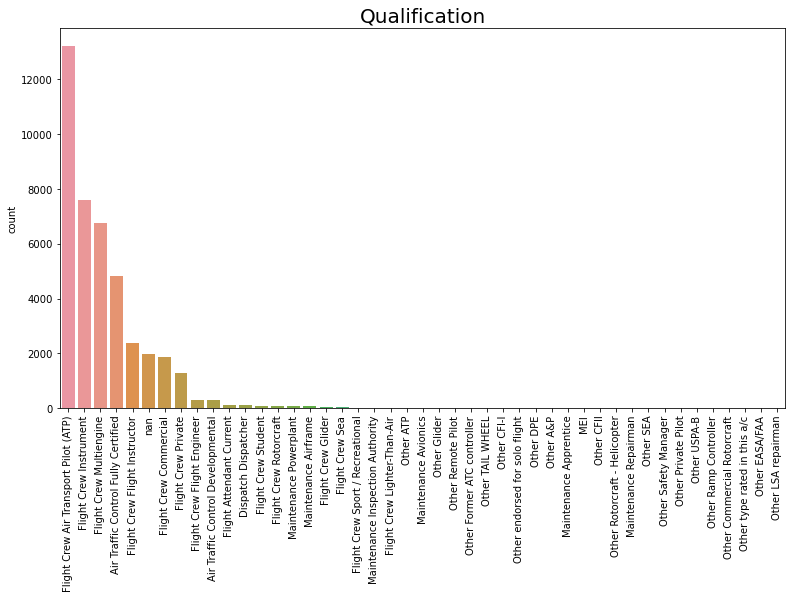

In [341]:
# Make a list of all 'Qualification' entries
qualifications = list()
for entry in df['Qualification']:
    split = str(entry).split(sep = '; ') # include a space after ';'
    qualifications = qualifications + split

# Countplot:
fig = plt.figure(figsize= (13,7))

sns.countplot(x = qualifications, order= pd.Series(qualifications).value_counts().index) # need to transform list to pd.Series for the ordering in countplot()
plt.xticks(rotation=90)
plt.title('Qualification', fontsize=20);

### 'Experience'

In [342]:
list(df['Experience'].unique())

[nan,
 'Flight Crew Last 90 Days 156; Flight Crew Type 290',
 'Flight Crew Last 90 Days 7; Flight Crew Total 314; Flight Crew Type 140',
 'Flight Crew Last 90 Days 45; Flight Crew Total 4500; Flight Crew Type 1100',
 'Flight Crew Last 90 Days 300; Flight Crew Total 5500; Flight Crew Type 4000',
 'Flight Crew Last 90 Days 210; Flight Crew Total 17550; Flight Crew Type 10250',
 'Flight Crew Last 90 Days 178; Flight Crew Type 12000',
 'Flight Crew Last 90 Days 25; Flight Crew Total 220; Flight Crew Type 160',
 'Flight Crew Last 90 Days 185',
 'Flight Crew Last 90 Days 75; Flight Crew Total 3850; Flight Crew Type 675',
 'Flight Crew Last 90 Days 75; Flight Crew Total 12500; Flight Crew Type 1425',
 'Flight Crew Last 90 Days 5; Flight Crew Total 65; Flight Crew Type 63',
 'Flight Crew Last 90 Days 61; Flight Crew Total 7000; Flight Crew Type 300',
 'Flight Crew Last 90 Days 100; Flight Crew Total 8900; Flight Crew Type 1800',
 'Flight Crew Last 90 Days 29; Flight Crew Total 8090; Flight Cre

### 'Detector'

In [343]:
list(df['Detector'].unique())

['Person Air Traffic Control',
 'Person Flight Crew',
 'Automation Aircraft Terrain Warning; Person Flight Crew',
 'Person Air Traffic Control; Person Flight Crew',
 'Automation Aircraft Other Automation; Person Flight Crew',
 'Automation Aircraft Terrain Warning',
 'Automation Aircraft RA; Person Flight Crew; Person Air Traffic Control',
 'Automation Aircraft RA; Person Air Traffic Control; Person Flight Crew',
 'Automation Aircraft Other Automation; Person Air Traffic Control; Person Flight Crew',
 'Automation Aircraft TA; Person Flight Crew',
 'Person Ground Personnel',
 'Person Other Person',
 'Automation Air Traffic Control; Person Flight Crew',
 'Automation Aircraft RA',
 'Person Flight Crew; Person Ground Personnel',
 'Person Flight Crew; Person Passenger',
 'Person Air Traffic Control; Person Ground Personnel',
 'Person Maintenance',
 'Automation Air Traffic Control; Person Air Traffic Control',
 'Automation Aircraft Terrain Warning; Person Air Traffic Control; Person Flight Cr

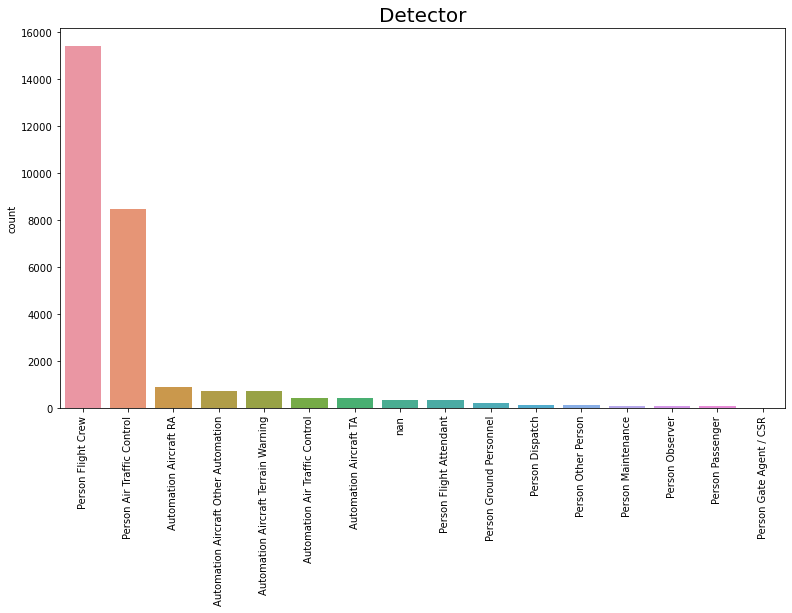

In [344]:
# Make a list of all 'Detector' entries
detector = list()
for entry in df['Detector']:
    split = str(entry).split(sep = '; ') # include a space after ';'
    detector = detector + split

# Countplot:
fig = plt.figure(figsize= (13,7))

sns.countplot(x = detector, order= pd.Series(detector).value_counts().index) # need to transform list to pd.Series for the ordering in countplot()
plt.xticks(rotation=90)
plt.title('Detector', fontsize=20);

### 'Result'

In [345]:
list(df['Result'].unique())

['Air Traffic Control Issued New Clearance',
 'General None Reported / Taken',
 'Flight Crew Returned To Clearance; Flight Crew Became Reoriented',
 'Air Traffic Control Provided Assistance; Flight Crew Diverted; Flight Crew Landed As Precaution; General Declared Emergency',
 'Flight Crew Took Evasive Action',
 'Air Traffic Control Issued Advisory / Alert; Flight Crew Took Evasive Action',
 'Aircraft Aircraft Damaged; Flight Crew Diverted; General Maintenance Action',
 'Flight Crew Took Evasive Action; Flight Crew Became Reoriented; Flight Crew Returned To Clearance',
 'Flight Crew Returned To Clearance',
 'Air Traffic Control Provided Assistance; Flight Crew Took Evasive Action',
 'Air Traffic Control Issued Advisory / Alert; Flight Crew Returned To Clearance; Flight Crew Took Evasive Action',
 'Air Traffic Control Issued Advisory / Alert; Flight Crew Returned To Clearance; Flight Crew Became Reoriented; Flight Crew Took Evasive Action',
 'Air Traffic Control Issued Advisory / Alert; 

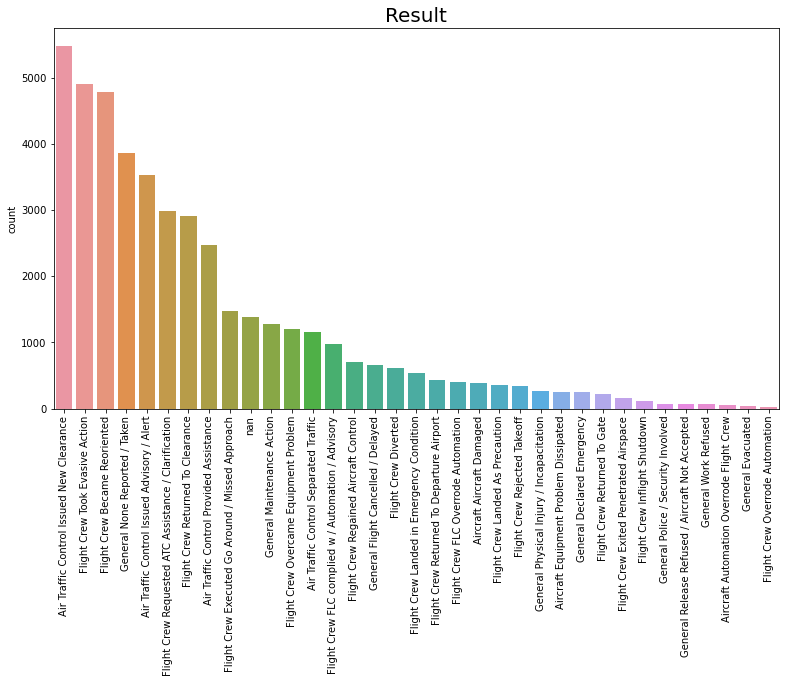

In [346]:
# Make a list of all 'Result' entries
result = list()
for entry in df['Result']:
    split = str(entry).split(sep = '; ') # include a space after ';'
    result = result + split

# Countplot:
fig = plt.figure(figsize= (13,7))

sns.countplot(x = result, order= pd.Series(result).value_counts().index) # need to transform list to pd.Series for the ordering in countplot()
plt.xticks(rotation=90)
plt.title('Result', fontsize=20);

This is a nice introductory plot for the entire dataset.

# Text mining on narratives

## Selecting the example we will work with

In [347]:
nar1_all['Narrative'][9]

"During approach to TUS; leg 5 of a 6-leg day; talking to Approach Control; we were cleared direct CALLS for the ILS 11L and cleared to descend to 5;000 FT. We called the airport in sight and were cleared for the visual approach and told to contact Tower. First Officer selected direct POCIB in the FMC; and selected 4;600 FT on the MCP. When we contacted Tower; the Controller said to check altitude and stated the MVA in the area was 5;900 FT. Simultaneously we received a 'Caution Terrain; Caution Obstacle' alert from the GPWS. First Officer executed go-around maneuver. We climbed to clear the alert. Once we were clear of the hazard; we continued our descent to the runway. An s-turn to the south was needed to lose altitude. The terrain feature was in use on both navigation displays; but did not show an immediate threat in front of the airplane. The turn to POCIB was not verbalized; but I was aware of it. This turn only changed our lateral course by a couple of degrees to the right; so I 

In [348]:
nar1_all['Narrative.1'][9]

"While on a descent into TUS; we had been given direct CALLS and descend to 5;000 FT. We were high on our profile due to a delayed descent. I had the speedbrakes extended and at some point in the process as we approached 5;000 FT; I extended the landing gear to slow and configure for the approach. Approach asked if we had the airport in sight and we confirmed airport in sight. Approach cleared us for the visual approach and told us to contact Tower. Once cleared for the visual; I selected POCIB in the FMC and went direct and reset the MCP altitude to 4;600 FT. The difference in heading change was less than ten degrees. We were still descending at 250 KTS with speed brake extended and gear down. When we switched to Tower; Tower said 'Check altitude; minimum vectoring in that area is 5;900 FT.' We were descending through 5;300 FT and within a few miles of POCIB. As Tower tells us this; we receive a GPWS Caution; 'Caution Obstacle Caution Terrain.' Even though it was a visual approach; it

In [349]:
nar1_all['Synopsis'][9]

'B737 flight crew experiences an EGPWS terrain caution just after a low altitude alert from the Tower during a night visual approach to Runway 11L at TUS. An immediate climb is initiated.'

## Define the input text

In [350]:
txt = nar1_all['Narrative'][9]
txt

"During approach to TUS; leg 5 of a 6-leg day; talking to Approach Control; we were cleared direct CALLS for the ILS 11L and cleared to descend to 5;000 FT. We called the airport in sight and were cleared for the visual approach and told to contact Tower. First Officer selected direct POCIB in the FMC; and selected 4;600 FT on the MCP. When we contacted Tower; the Controller said to check altitude and stated the MVA in the area was 5;900 FT. Simultaneously we received a 'Caution Terrain; Caution Obstacle' alert from the GPWS. First Officer executed go-around maneuver. We climbed to clear the alert. Once we were clear of the hazard; we continued our descent to the runway. An s-turn to the south was needed to lose altitude. The terrain feature was in use on both navigation displays; but did not show an immediate threat in front of the airplane. The turn to POCIB was not verbalized; but I was aware of it. This turn only changed our lateral course by a couple of degrees to the right; so I 

In [351]:
txt1 = nar1_all['Narrative.1'][9]

### Deal with the numbers using Regular Expressions

In [352]:
def subst_RegEX(text): 
    """
    Substitute several aviation-related entries (runway identifiers, altitude indications, etc.) 
    with general labels in a given text
    """
    
    import re

    # Altitudes
    r = re.compile(r"""

                \d+;{1,1}\d+\s{1,1}FT       # >> deals with altitude indications, e.g.: '4;600 FT'

                                            # at least one number followed by exactly one ';', 
                                            # followed by at least one number.

                  """, re.VERBOSE)

    # Substitute all RegEx's found :
    text = (r.sub('AltVal', text))
    
    # Runways
    r = re.compile(r"""

                \d\d(L | R)                 # >> deals with runway identifiers e.g.: '11L'           

                                            # exactly two digits, followed by either 'L' or 'R'

                                            # The number (not less or more than 2 digits) indicates the RWY
                                            # orientation in tens of degrees. 

                                            # '11L' means : orientation of 110 deg, left RWY.
                                            # There can only be 'left' or 'right' (as far as Ioannis knows), 
                                            # since RWY are build parallel to each other.
                                            # RWYs not parallel will have a different orientation, i.e. different digits              
                  """, re.VERBOSE)

    # Substitute all RegEx's found :
    text = (r.sub('RwyID', text))
    
    # Numbers, other than altitudes
    r = re.compile(r"""

                [0-9]+                     # at least one number            

                  """, re.VERBOSE)

    # Substitute all RegEx's found :
    text = (r.sub('NumVal', text))
    
    return text

In [353]:
subst_RegEX(txt)

"During approach to TUS; leg NumVal of a NumVal-leg day; talking to Approach Control; we were cleared direct CALLS for the ILS RwyID and cleared to descend to AltVal. We called the airport in sight and were cleared for the visual approach and told to contact Tower. First Officer selected direct POCIB in the FMC; and selected AltVal on the MCP. When we contacted Tower; the Controller said to check altitude and stated the MVA in the area was AltVal. Simultaneously we received a 'Caution Terrain; Caution Obstacle' alert from the GPWS. First Officer executed go-around maneuver. We climbed to clear the alert. Once we were clear of the hazard; we continued our descent to the runway. An s-turn to the south was needed to lose altitude. The terrain feature was in use on both navigation displays; but did not show an immediate threat in front of the airplane. The turn to POCIB was not verbalized; but I was aware of it. This turn only changed our lateral course by a couple of degrees to the right;

In [354]:
subst_RegEX(txt1)

"While on a descent into TUS; we had been given direct CALLS and descend to AltVal. We were high on our profile due to a delayed descent. I had the speedbrakes extended and at some point in the process as we approached AltVal; I extended the landing gear to slow and configure for the approach. Approach asked if we had the airport in sight and we confirmed airport in sight. Approach cleared us for the visual approach and told us to contact Tower. Once cleared for the visual; I selected POCIB in the FMC and went direct and reset the MCP altitude to AltVal. The difference in heading change was less than ten degrees. We were still descending at NumVal KTS with speed brake extended and gear down. When we switched to Tower; Tower said 'Check altitude; minimum vectoring in that area is AltVal.' We were descending through AltVal and within a few miles of POCIB. As Tower tells us this; we receive a GPWS Caution; 'Caution Obstacle Caution Terrain.' Even though it was a visual approach; it was at

## TOKENIZATION & STOP WORD FILTERING

In [355]:
def tokenize_filter(text):
    """
    Tokenizes 'text' and filters out stop-words (incl. user-defined ones)
    """
    # TOKENIZE

    ############################################
    ### This needs to be executed the 1st time:
    # import nltk
    # nltk.download('punkt')
    ############################################

    from nltk.tokenize import word_tokenize

    tokens = word_tokenize(text.lower(), language = 'english') 
    # lower-casing the text is crucial for the stop word filtering below
    #print("Tokenized words: \n\n", words)
    
    
    # STOP WORD FILTERING
    
    # Import stopwords from nltk.corpus
    from nltk.corpus import stopwords

    # Initialiser la variable des mots vides
    stop_words = set(stopwords.words('english')) 
    # we convert it to a set, qui sera plus efficient (vs. une liste) dans la recherche des stopwords. 
    # 'set' also avoids duplicates.

    # add additional stop words, if desired : 
    stop_words.update(['.', ';', '[', ']'])
    #print("\n\nThe set of stop words, including additional stop words is: \n\n", stop_words)
    
    # inner function
    def stop_words_filtering(my_list):
        """
        Delete stop words from the function input ‘my_list’.
        """
        # remove duplicate words from liste
        set_my_list = set(my_list) 
        my_list = list(set_my_list)

        for stopword in stop_words:

            if stopword in my_list:
                my_list.remove(stopword)

        return my_list

    # call the inner function
    tokenized_filtered_words = stop_words_filtering(tokens)
    
    return tokenized_filtered_words

In [356]:
tokenize_filter(txt)

['pocib',
 'direct',
 'monitoring',
 'called',
 'turn',
 'trying',
 'obstacle',
 'threat',
 'caution',
 'maneuver',
 'area',
 'lose',
 'difference',
 'us',
 'contact',
 'check',
 'staying',
 'degrees',
 'selected',
 'climbed',
 'immediate',
 "'",
 'front',
 'even',
 'situational',
 'airplane',
 'navigation',
 'especially',
 'altitude',
 'captain/pilot',
 'ft',
 'south',
 'brought',
 'mountainous',
 'clear',
 'previously',
 'enough',
 's-turn',
 'lateral',
 'alert',
 'contacted',
 'feature',
 'runway',
 'verbalization',
 'calls',
 'think',
 'visual',
 'gpws',
 'displays',
 'apparently',
 'changes',
 'better',
 'ils',
 'fmc',
 'would',
 'use',
 'hazard',
 'course',
 'initially',
 'night',
 'laterally',
 'changed',
 'sight',
 'continued',
 'conditions',
 'flying',
 'close',
 'approach',
 '11l',
 'told',
 '6-leg',
 'executed',
 'tower',
 'received',
 'descent',
 'verbalized',
 'talking',
 'path',
 'control',
 'big',
 'programming',
 'first',
 'airport',
 'salvage',
 'show',
 'ft.',
 'neede

In [357]:
# def stop_words_filtering(my_list):
#     """
#     Delete stop words from the function input ‘my_list’.
#     """
#     # remove duplicate words from liste
#     set_my_list = set(my_list) 
#     my_list = list(set_my_list)
    
#     for stopword in stop_words:

#         if stopword in my_list:
#             my_list.remove(stopword)
        
#     return my_list


# # call the function
# words = stop_words_filtering(words)
# words

['pocib',
 'direct',
 'monitoring',
 'turn',
 'called',
 'trying',
 'obstacle',
 'threat',
 'caution',
 'maneuver',
 'area',
 'lose',
 'us',
 'difference',
 'contact',
 'check',
 'staying',
 'degrees',
 'selected',
 'climbed',
 'immediate',
 "'",
 'front',
 'even',
 'situational',
 'airplane',
 'navigation',
 'especially',
 'altitude',
 'captain/pilot',
 'south',
 'brought',
 'mountainous',
 'clear',
 'previously',
 'enough',
 's-turn',
 'lateral',
 'alert',
 'contacted',
 'feature',
 'runway',
 'verbalization',
 'calls',
 'think',
 'visual',
 'gpws',
 'displays',
 'apparently',
 'changes',
 'better',
 'ils',
 'fmc',
 'would',
 'use',
 'rwyid',
 'hazard',
 'course',
 'initially',
 'night',
 'laterally',
 'conditions',
 'sight',
 'changed',
 'continued',
 'flying',
 'close',
 'approach',
 'told',
 'executed',
 'tower',
 'received',
 'descent',
 'verbalized',
 'talking',
 'path',
 'numval',
 'control',
 'big',
 'programming',
 'first',
 'airport',
 'salvage',
 'show',
 'needed',
 'numval

## WORDCLOUD

In [358]:
# from wordcloud import WordCloud

# # Instancier le calque (layer)
# wc = WordCloud(max_words= 100, stopwords= stop_words, max_font_size= 50, random_state=42, collocations = False, background_color= 'white')
# # collocation (bigrams, trigrams): two/three adjacent words, such as 'CT scan', 'machine learning', or 'social media

# # Afficher le wordcloud:
# import matplotlib.pyplot as plt 

# # Générer et afficher le nuage de mots
# plt.figure(figsize= (10,6)) # Initialisation d'une figure

# wc.generate(txt)           # "Calcul" du wordcloud

# plt.imshow(wc, interpolation="bilinear") # Affichage
# plt.title("WordCloud for 'txt'", fontsize = 20)
# plt.show()

In [359]:
# from wordcloud import WordCloud

# # Instancier le calque (layer)
# wc = WordCloud(max_words= 100, stopwords= stop_words, max_font_size= 50, random_state=42, collocations = False, background_color= 'white')
# # collocation (bigrams, trigrams): two/three adjacent words, such as 'CT scan', 'machine learning', or 'social media

# # Afficher le wordcloud:
# import matplotlib.pyplot as plt 

# # Générer et afficher le nuage de mots
# plt.figure(figsize= (10,6)) # Initialisation d'une figure

# wc.generate(txt1)           # "Calcul" du wordcloud

# plt.imshow(wc, interpolation="bilinear") # Affichage
# plt.title("WordCloud for 'txt1'", fontsize = 20)
# plt.show()

In [360]:
def plot_word_cloud(text, masque, background_color = "white") :
    """
    Afficher un nuage de mots à partir de la chaîne de caractères text sous forme du masque 'masque'.
    """
    from wordcloud import WordCloud
    from PIL import Image 
    # PIL: Python Imaging Library. Adds image processing capabilities to your Python interpreter.

    # Définir un masque
    mask_coloring = np.array(Image.open(str(masque)))

    # Définir le calque du nuage des mots
    wc = WordCloud(background_color=background_color, 
                   max_words=150, 
                   stopwords=stop_words, 
                   mask = mask_coloring, 
                   max_font_size=40, random_state=42)
    
    # Générer et afficher le nuage de mots
    plt.figure(figsize= (20,10))
    wc.generate(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.xticks([])
    plt.yticks([])
    plt.title("WordCloud", fontsize = 20)
    plt.show()

WordCloud for 'txt':


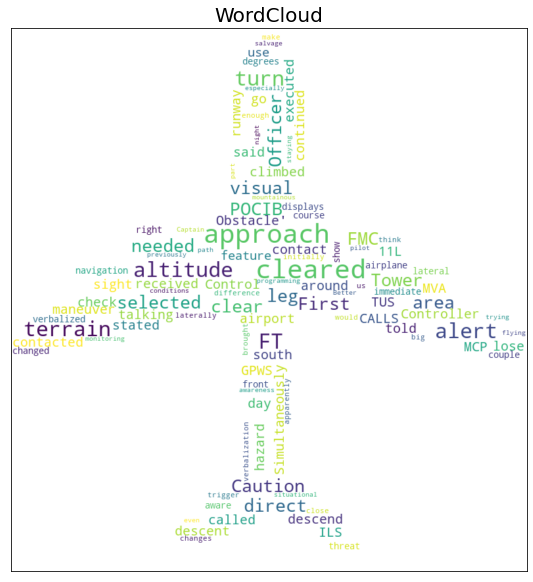

WordCloud for 'txt1':


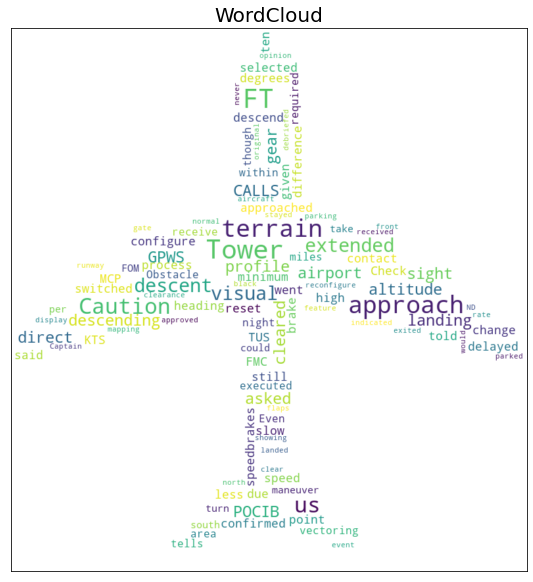

In [361]:
# call the function defined above:
print("WordCloud for 'txt':")
plot_word_cloud(txt, "plane.png")

print("WordCloud for 'txt1':")
plot_word_cloud(txt1, "plane.png")

## WORD HISTOGRAMM

In [362]:
def plot_word_hist(tokens):
    """
    Plot histogram of most common words. Pass 'tokens' after stop word filtering.
    """
    
    # Dans une variable nommé chaine, fusionner tous les commentaires négatifs dans une chaine de caractère
    #chaine = ''
    chaine = ' '.join(entry.lower() for entry in tokens)

    from collections import Counter
    # transforme une liste en un dictionnaire, où un élément de la liste devient une clé, associée à son nombre d'occurrences (valeur dans le dict)
    dico = Counter(chaine.split())

    # retourne une liste des 15 premiers mots les plus utilisés avec leur nombre d'occurrences:
    dico.most_common(15)

    # PLOT a histogram of words using Seaborn
    # Define input data:
    X = [dico.most_common(20)[i][0] for i in range(len(dico.most_common(15)))]
    Y = [dico.most_common(20)[i][1] for i in range(len(dico.most_common(15)))]

    import seaborn as sns
    plt.figure(figsize= (10,6))

    sns.barplot(x = X, y = Y)
    plt.xticks(rotation=90);

    plt.xlabel('Words')
    plt.ylabel('Frequency')

    plt.title('20 most common words');
    

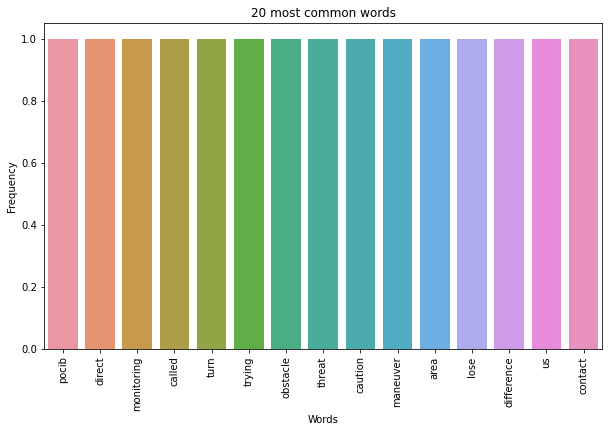

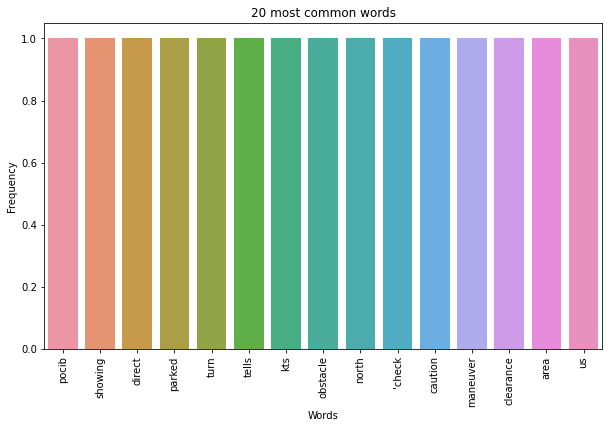

In [363]:
# Call the function
plot_word_hist(tokenize_filter(txt))
plot_word_hist(tokenize_filter(txt1))

# Machine Learning on the most frequent Primary Problems

The most frequent Primary Problems in the data are (in decreasing order): 
- Human Factors
    
- Procedure
    
- Ambiguous
    
- Aircraft 
  
- Weather

Let's select only these data, leaving out 'Ambiguous' data to start with.

In [402]:
df_ML = df.loc[df['Primary Problem'].isin(['Human Factors', 'Procedure', 'Aircraft', 'Weather'])]

In [403]:
len(df_ML)

16483

In [404]:
def tokenize_filter_make_text(text):
    tokens = tokenize_filter(text)
    chaine = ' '.join(entry.lower() for entry in tokens)
    
    return chaine

In [400]:
df_ML['Narrative'][5]

"A C560 was vectored northbound over PHX at [5000 ft] enroute to SDL. The COL4 was southbound at [4500 ft] on the East Transition over PHX. These are altitudes on routes per our SOP. Both aircraft were level. Traffic was called for both aircraft and they were told the other was level. The C560 passed over the COL4 and responded to an RA. He climbed 200 FT; saw the other aircraft; and then descended back to his assigned altitude. Separation and safety was maintained on routes and altitudes per the P50 SOP. The only way to avoid this completely would have been to climb the C560 to [6000 ft]; which would have been a 1;000 FT climb within 10-15 miles from his destination and it would require coordination. If another aircraft was at that altitude it wouldn't have been an option. There wasn't anything else I could have done to help."

In [401]:
X = tokenize_filter_make_text(df_ML['Narrative'][5])
X

"sop called col4 saw transition enroute traffic passed climbed completely assigned anything altitude c560 level maintained ft help 4500 n't safety coordination done way climb would avoid could responded 5000 told else option northbound altitudes routes east p50 aircraft within 200 per sdl phx destination 1 vectored 10-15 back miles require 6000 southbound descended 000 another ra separation"

In [405]:
from sklearn.model_selection import train_test_split

X = df_ML['Narrative']
y = df_ML['Primary Problem'] # target value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

vectorizer = CountVectorizer(stop_words= stop_words)

X_train = vectorizer.fit_transform(X_train).todense() 
# .toarray() returns an numpy array. 
# .todense() returns a numpy matrix. 
# Each type comes with its set of methods...


# Selon la version de sklearn le classifier clf n'accepte pas les matrices sparses. Il faut alors utiliser la méthode toarray() pour que la matrice soit compatible.

X_test = vectorizer.transform(X_test).todense()

#  Train a classifier:
clf = GradientBoostingClassifier(n_estimators= 100, learning_rate= 1.0, max_depth= 1, random_state= 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Confusion matrix
pd.crosstab(y_test, y_pred, rownames=['real'], colnames=['predicted'])

/Users/gs/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))